# IST340 - Final Project: Evaluating Risk Factors of Student Loan Borrowers

## Import Essential Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import numpy as np

import math

import matplotlib.pyplot as plt 

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

## Define File Path

In [2]:
file_path = './data/'

## Reading Excel Files into DataFrame

In [3]:
family_income = pd.read_excel(file_path + "Family_Income.xlsx")
family_income.head()

,STUDENT_ID,Family_Income
0,1,109770.95
1,2,58442.99
2,3,97125.87
3,4,55256.40
4,5,58187.16


In [4]:
credit_rating = pd.read_excel(file_path + "CreditRating Data 2012.xlsx")
credit_rating.head()

,STUDENT_ID,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,0.495227,0.767967
1,2,0.987649,0.529815
2,3,0.249315,0.589539
3,4,0.653183,0.805702
4,5,0.273099,0.415433


In [5]:
hs_academics = pd.read_excel(file_path + "HS_Academics 2012.xlsx")
hs_academics.head()

,STUDENT_ID,HS_Math,HS_Science,HS_English
0,1,10,10,10.0
1,2,9,9,10.0
2,3,9,6,6.0
3,4,10,9,9.0
4,5,6,8,5.0


In [6]:
loan_amount = pd.read_excel(file_path + "LoanAmount.xlsx")
loan_amount.head()

,STUDENT_ID,Loan_Amount
0,1,19861
1,2,17391
2,3,8118
3,4,18905
4,5,16175


In [7]:
parents_education = pd.read_excel(file_path + "Parents_Education.xlsx")
parents_education.head()

,STUDENT_ID,PARENTS_EDUCATION_LEVEL
0,1,Bachelor's
1,2,Doctorate
2,3,HS or Lower
3,4,Master's
4,5,Master's


In [8]:
personality_characteristics = pd.read_excel(file_path + "Personality Characteristics Data.xlsx")
personality_characteristics.head()

,STUDENT_ID,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore
0,1,0.956004,Emotional,0.767967,0.189491
1,2,0.601589,Analytical,1.000000,0.529815
2,3,0.655254,Emotional,0.589539,0.589539
3,4,0.841278,Emotional,0.805702,0.061538
4,5,0.738851,Emotional,0.415433,0.241257


In [9]:
region__marital_status = pd.read_excel(file_path + "Region, Marital Status.xlsx")
region__marital_status.head()

,STUDENT_ID,Country,Region,Married
0,1,USA,2,1
1,2,USA,5,0
2,3,USA,2,1
3,4,USA,1,0
4,5,USA,3,0


## Parsing Prolog-Style .pl Files into DataFrame

### enlist.pl

In [10]:
# Read the enlist.pl file line by line
with open(file_path + "enlist.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

% enlist(student,Service).

% student is enlisted in Service.



enlist(student40,fire_department).

enlist(student51,fire_department).



In [11]:
# Extract student number and service
data = []
for line in lines: # for each row
    match = re.match(r'enlist\(student(\d+),(\w+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        service = match.group(2)             # the text after the comma
        data.append((student_number, service))


# Convert to DataFrame
enlist = pd.DataFrame(data, columns=['STUDENT_ID', 'Service'])
enlist.head()

,STUDENT_ID,Service
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


### disabled.pl

In [12]:
# Read the disabled.pl file line by line
with open(file_path + "disabled.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

disabled(student992).

disabled(student976).

disabled(student963).

disabled(student918).

disabled(student913).



In [13]:
# Extract student number and disabled status
data = []
for line in lines: # for each row
    match = re.match(r'disabled\(student(\d+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        disabled_status = bool(match.group(0))
        data.append((student_number, disabled_status))


# Convert to DataFrame
disabled_df = pd.DataFrame(data, columns=['STUDENT_ID', 'Disabled'])
disabled_df.head()

,STUDENT_ID,Disabled
0,992,True
1,976,True
2,963,True
3,918,True
4,913,True


### enrolled.pl

In [14]:
# Read the enrolled.pl file line by line
with open(file_path + "enrolled.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

% enrolled(Student,School,Units).

% Student is enrolled for Units at School



enrolled(student10,ucb,2).

enrolled(student18,ucsd,4).



In [15]:
# Extract student number and enrolled status
data = []
for line in lines: # for each row
    match = re.match(r'enrolled\(student(\d+),(\w+),(\w+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        school = match.group(2)
        course_units = match.group(3)
        data.append((student_number, school, course_units))


# Convert to DataFrame
enrolled_df = pd.DataFrame(data, columns=['STUDENT_ID', 'School', 'Course Units'])
enrolled_df.head()

,STUDENT_ID,School,Course Units
0,10,ucb,2
1,18,ucsd,4
2,20,ucsd,3
3,35,ucsd,4
4,44,ucsd,1


### filed_for_bankruptcy.pl

In [16]:
# Read the filed_for_bankruptcy.pl file line by line
with open(file_path + "filed_for_bankruptcy.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

filed_for_bankrupcy(student999).

filed_for_bankrupcy(student998).

filed_for_bankrupcy(student958).

filed_for_bankrupcy(student956).

filed_for_bankrupcy(student953).



In [17]:
# Extract student number and bankruptcy status
data = []
for line in lines: # for each row
    match = re.match(r'filed_for_bankrupcy\(student(\d+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        bankruptcy_status = bool(match.group(0))
        data.append((student_number, bankruptcy_status))


# Convert to DataFrame
bankruptcy_df = pd.DataFrame(data, columns=['STUDENT_ID', 'Filed_for_Bankruptcy'])
bankruptcy_df.head()

,STUDENT_ID,Filed_for_Bankruptcy
0,999,True
1,998,True
2,958,True
3,956,True
4,953,True


### male.pl

In [18]:
# Read the male.pl file line by line
with open(file_path + "male.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

male(student997).

male(student994).

male(student992).

male(student987).

male(student986).



In [19]:
# Extract student number and male status
data = []
for line in lines: # for each row
    match = re.match(r'male\(student(\d+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        male_status = bool(match.group(0))
        data.append((student_number, male_status))


# Convert to DataFrame
male_df = pd.DataFrame(data, columns=['STUDENT_ID', 'Male'])
male_df.head()

,STUDENT_ID,Male
0,997,True
1,994,True
2,992,True
3,987,True
4,986,True


### unemployed.pl

In [20]:
# Read the unemployed.pl file line by line
with open(file_path + "unemployed.pl", 'r') as file:
    lines = file.readlines()

# Let's take a look at the file (first 5 rows)
for line in lines[:5]: # Print the first 5 rows
    print(line)

unemployed(student1000).

unemployed(student996).

unemployed(student993).

unemployed(student948).

unemployed(student946).



In [21]:
# Extract student number and unemployed status
data = []
for line in lines: # for each row
    match = re.match(r'unemployed\(student(\d+)\)\.', line.strip())
    if match:
        student_number = int(match.group(1)) # Extract the student ID and convert to integer
        unemployed_status = bool(match.group(0))
        data.append((student_number, unemployed_status))


# Convert to DataFrame
unemployed_df = pd.DataFrame(data, columns=['STUDENT_ID', 'Unemployed'])
unemployed_df.head()

,STUDENT_ID,Unemployed
0,1000,True
1,996,True
2,993,True
3,948,True
4,946,True


### Parsing of Similarly Formatted Files

In [22]:
# Creation of a Reusable Parsing Function
def parse_prolog_file(file_name):
    """
    Parses a .pl Prolog-like file and returns a DataFrame with:
    - Function (e.g., 'enlist', 'no_payment_due')
    - StudentNumber (e.g., 1000)
    - Label (e.g., 'fire_department', 'pos', 'neg')
    """
    pattern = r'(\w+)\(student(\d+),(\w+)\)\.'

    parsed_data = []
    with open(file_path + file_name, 'r') as f:
        for line in f:
            match = re.match(pattern, line.strip())
            if match:
                function_name = match.group(1)
                student_number = int(match.group(2))
                label = match.group(3)
                parsed_data.append((student_number, label))

    return pd.DataFrame(parsed_data, columns=['STUDENT_ID', function_name])

In [23]:
enlist_df = parse_prolog_file("enlist.pl")
enlist_df.head()

,STUDENT_ID,enlist
0,40,fire_department
1,51,fire_department
2,109,fire_department
3,139,fire_department
4,148,fire_department


In [24]:
nopaymentdue = parse_prolog_file("no_payment_due.pl")
nopaymentdue.head()

,STUDENT_ID,no_payment_due
0,1000,pos
1,999,pos
2,998,pos
3,996,pos
4,994,pos


In [25]:
longest_absence_from_school_df = parse_prolog_file("longest_absense_from_school.pl")
longest_absence_from_school_df.head()

,STUDENT_ID,longest_absense_from_school
0,1000,7
1,999,4
2,998,1
3,997,8
4,996,7


## Merging of All DataFrames

In [26]:
# Check row count of dataframes

print(len(enrolled_df))
print(len(family_income))
print(len(credit_rating))
print(len(hs_academics))
print(len(loan_amount))
print(len(parents_education))
print(len(personality_characteristics))
print(len(region__marital_status))
print(len(longest_absence_from_school_df))
print(len(nopaymentdue))
print(len(male_df))
print(len(enlist_df))
print(len(unemployed_df))
print(len(bankruptcy_df))
print(len(disabled_df))

1194
1000
1000
1000
1000
1000
1000
1000
1000
1000
497
306
98
96
95


In [27]:
# Merge family_income with credit_rating

merged_df = pd.merge(family_income, credit_rating, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj
0,1,109770.95,0.495227,0.767967
1,2,58442.99,0.987649,0.529815
2,3,97125.87,0.249315,0.589539
3,4,55256.40,0.653183,0.805702
4,5,58187.16,0.273099,0.415433


In [28]:
# Merge combined dataframe with region__marital_status

merged_df = pd.merge(merged_df, region__marital_status, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married
0,1,109770.95,0.495227,0.767967,USA,2,1
1,2,58442.99,0.987649,0.529815,USA,5,0
2,3,97125.87,0.249315,0.589539,USA,2,1
3,4,55256.40,0.653183,0.805702,USA,1,0
4,5,58187.16,0.273099,0.415433,USA,3,0


In [29]:
# Merge combined dataframe with enlist_df

merged_df = pd.merge(merged_df, enlist_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN
3,4,55256.40,0.653183,0.805702,USA,1,0,marines
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN


In [30]:
# Merge combined dataframe with unemployed_df

merged_df = pd.merge(merged_df, unemployed_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN


In [31]:
# Merge combined dataframe with male_df

merged_df = pd.merge(merged_df, male_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN


In [32]:
# Merge combined dataframe with personality_characteristics

merged_df = pd.merge(merged_df, personality_characteristics, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257


In [33]:
# Merge combined dataframe with disabled_df

merged_df = pd.merge(merged_df, disabled_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN


In [34]:
# Merge combined dataframe with parents_education

merged_df = pd.merge(merged_df, parents_education, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's


In [35]:
# Merge combined dataframe with hs_academics

merged_df = pd.merge(merged_df, hs_academics, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0


In [36]:
# Merge combined dataframe with enrolled_df

merged_df = pd.merge(merged_df, enrolled_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5


In [37]:
# Merge combined dataframe with longest_absence_from_school_df

merged_df = pd.merge(merged_df, longest_absence_from_school_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units,longest_absense_from_school
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11,1
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11,6
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1,4
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6,5
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5,2


In [38]:
# Merge combined dataframe with bankruptcy_df

merged_df = pd.merge(merged_df, bankruptcy_df, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units,longest_absense_from_school,Filed_for_Bankruptcy
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11,1,NaN
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11,6,True
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1,4,NaN
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6,5,NaN
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5,2,NaN


In [39]:
# Merge combined dataframe with loan_amount

merged_df = pd.merge(merged_df, loan_amount, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units,longest_absense_from_school,Filed_for_Bankruptcy,Loan_Amount
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11,1,NaN,19861
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11,6,True,17391
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1,4,NaN,8118
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6,5,NaN,18905
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5,2,NaN,16175


In [40]:
# Merge combined dataframe with nopaymentdue

merged_df = pd.merge(merged_df, nopaymentdue, on='STUDENT_ID', how='left')
merged_df.head()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Country,Region,Married,enlist,Unemployed,Male,LongTermPlannerScore,DecisionStyle,PowerOrientedScore,CommunityOrientedScore,Disabled,PARENTS_EDUCATION_LEVEL,HS_Math,HS_Science,HS_English,School,Course Units,longest_absense_from_school,Filed_for_Bankruptcy,Loan_Amount,no_payment_due
0,1,109770.95,0.495227,0.767967,USA,2,1,NaN,NaN,True,0.956004,Emotional,0.767967,0.189491,NaN,Bachelor's,10,10,10.0,occ,11,1,NaN,19861,pos
1,2,58442.99,0.987649,0.529815,USA,5,0,NaN,NaN,NaN,0.601589,Analytical,1.000000,0.529815,NaN,Doctorate,9,9,10.0,uci,11,6,True,17391,pos
2,3,97125.87,0.249315,0.589539,USA,2,1,NaN,NaN,True,0.655254,Emotional,0.589539,0.589539,NaN,HS or Lower,9,6,6.0,occ,1,4,NaN,8118,neg
3,4,55256.40,0.653183,0.805702,USA,1,0,marines,NaN,True,0.841278,Emotional,0.805702,0.061538,NaN,Master's,10,9,9.0,uci,6,5,NaN,18905,pos
4,5,58187.16,0.273099,0.415433,USA,3,0,NaN,NaN,NaN,0.738851,Emotional,0.415433,0.241257,NaN,Master's,6,8,5.0,smc,5,2,NaN,16175,neg


## Data Understanding

In [41]:
# Prepare merged_df for examination by filling in missing boolean data in converted dataframes
# 'Unemployed'
merged_df['Unemployed'].fillna(False, inplace=True)
merged_df['Unemployed'].head()

0    False
1    False
2    False
3    False
4    False
Name: Unemployed, dtype: bool

In [42]:
# 'Male'
merged_df['Male'].fillna(False, inplace=True)
merged_df['Male'].head()

0     True
1    False
2     True
3     True
4    False
Name: Male, dtype: bool

In [43]:
# 'Disabled'
merged_df['Disabled'].fillna(False, inplace=True)
merged_df['Disabled'].head()

0    False
1    False
2    False
3    False
4    False
Name: Disabled, dtype: bool

In [44]:
# 'Bankrupted'
merged_df['Filed_for_Bankruptcy'].fillna(False, inplace=True)
merged_df['Filed_for_Bankruptcy'].head()

0    False
1     True
2    False
3    False
4    False
Name: Filed_for_Bankruptcy, dtype: bool

In [45]:
# Export merged_df to an Excel file in the same folder as the datasets
merged_df.to_excel(file_path + 'merged_data.xlsx')

In [46]:
# Use df variable for project, instead of merged_df
df = merged_df

### Examine Data Information

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   STUDENT_ID                   1260 non-null   int64  
 1   Family_Income                1260 non-null   float64
 2   Credit_Score_Raw             1260 non-null   float64
 3   Credit_Score_AgeAdj          1260 non-null   float64
 4   Country                      1260 non-null   object 
 5   Region                       1260 non-null   int64  
 6   Married                      1260 non-null   int64  
 7   enlist                       370 non-null    object 
 8   Unemployed                   1260 non-null   bool   
 9   Male                         1260 non-null   bool   
 10  LongTermPlannerScore         1260 non-null   float64
 11  DecisionStyle                1260 non-null   object 
 12  PowerOrientedScore           1260 non-null   float64
 13  CommunityOrientedS

### Describe Data

In [48]:
df.describe()

,STUDENT_ID,Family_Income,Credit_Score_Raw,Credit_Score_AgeAdj,Region,Married,LongTermPlannerScore,PowerOrientedScore,CommunityOrientedScore,HS_Math,HS_Science,HS_English,Loan_Amount
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1242.000000,1260.000000
mean,500.082540,75502.520984,0.464567,0.553017,3.026984,0.538889,0.702783,0.616710,0.378621,8.161905,8.111905,8.132045,17056.052381
std,291.320155,22844.324552,0.231376,0.194809,1.411707,0.500274,0.172631,0.198915,0.211250,1.680844,1.604507,1.542925,3420.960718
min,1.000000,35074.290000,0.000735,0.045899,1.000000,0.000000,0.090978,0.076820,0.000108,2.000000,3.000000,2.000000,5847.000000
25%,245.750000,56019.192500,0.279951,0.419019,2.000000,0.000000,0.590070,0.497876,0.212438,7.000000,7.000000,7.000000,16784.000000
50%,501.500000,74882.970000,0.516725,0.565426,3.000000,1.000000,0.721543,0.642565,0.374887,9.000000,8.000000,8.000000,18329.000000
75%,754.250000,95389.937500,0.626726,0.708184,4.000000,1.000000,0.830666,0.749785,0.528535,10.000000,9.000000,9.000000,19065.250000
max,1000.000000,114967.960000,1.000000,0.985665,5.000000,2.000000,0.996835,1.000000,0.932651,10.000000,10.000000,10.000000,19992.000000


### Check Default Data Types

In [49]:
df.dtypes

STUDENT_ID                       int64
Family_Income                  float64
Credit_Score_Raw               float64
Credit_Score_AgeAdj            float64
Country                         object
Region                           int64
Married                          int64
enlist                          object
Unemployed                        bool
Male                              bool
LongTermPlannerScore           float64
DecisionStyle                   object
PowerOrientedScore             float64
CommunityOrientedScore         float64
Disabled                          bool
PARENTS_EDUCATION_LEVEL         object
HS_Math                          int64
HS_Science                       int64
HS_English                     float64
School                          object
Course Units                    object
longest_absense_from_school     object
Filed_for_Bankruptcy              bool
Loan_Amount                      int64
no_payment_due                  object
dtype: object

### Check Missing Values for each Column

In [50]:
df.isnull().sum()/len(df)*100

STUDENT_ID                      0.000000
Family_Income                   0.000000
Credit_Score_Raw                0.000000
Credit_Score_AgeAdj             0.000000
Country                         0.000000
Region                          0.000000
Married                         0.000000
enlist                         70.634921
Unemployed                      0.000000
Male                            0.000000
LongTermPlannerScore            0.000000
DecisionStyle                   0.000000
PowerOrientedScore              0.000000
CommunityOrientedScore          0.000000
Disabled                        0.000000
PARENTS_EDUCATION_LEVEL         0.000000
HS_Math                         0.000000
HS_Science                      0.000000
HS_English                      1.428571
School                          3.333333
Course Units                    3.333333
longest_absense_from_school     0.000000
Filed_for_Bankruptcy            0.000000
Loan_Amount                     0.000000
no_payment_due  

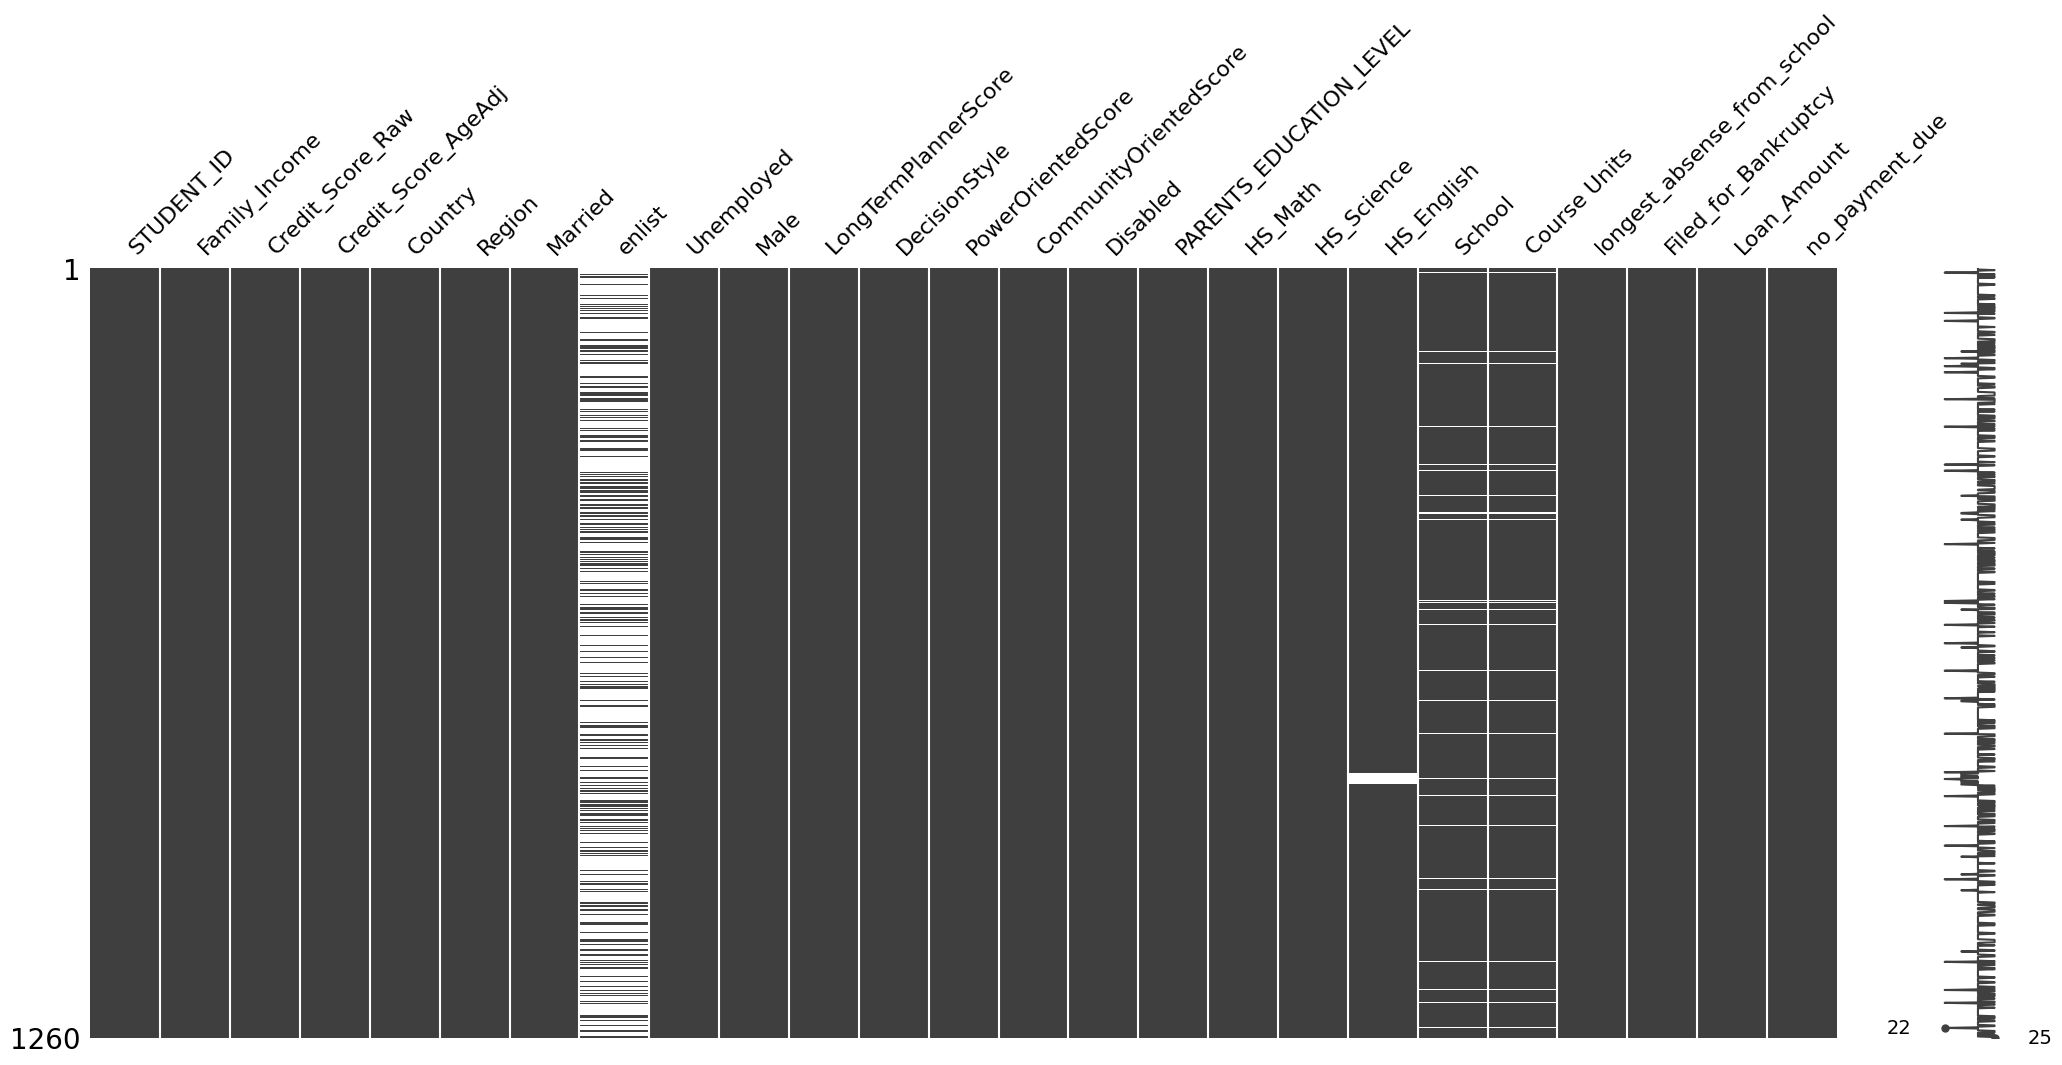

In [51]:
# missingno matrix visualization
import missingno as msno
%matplotlib inline
%config InLineBackend.figure_format = 'png'

msno.matrix(df)
plt.show()

<Axes: >

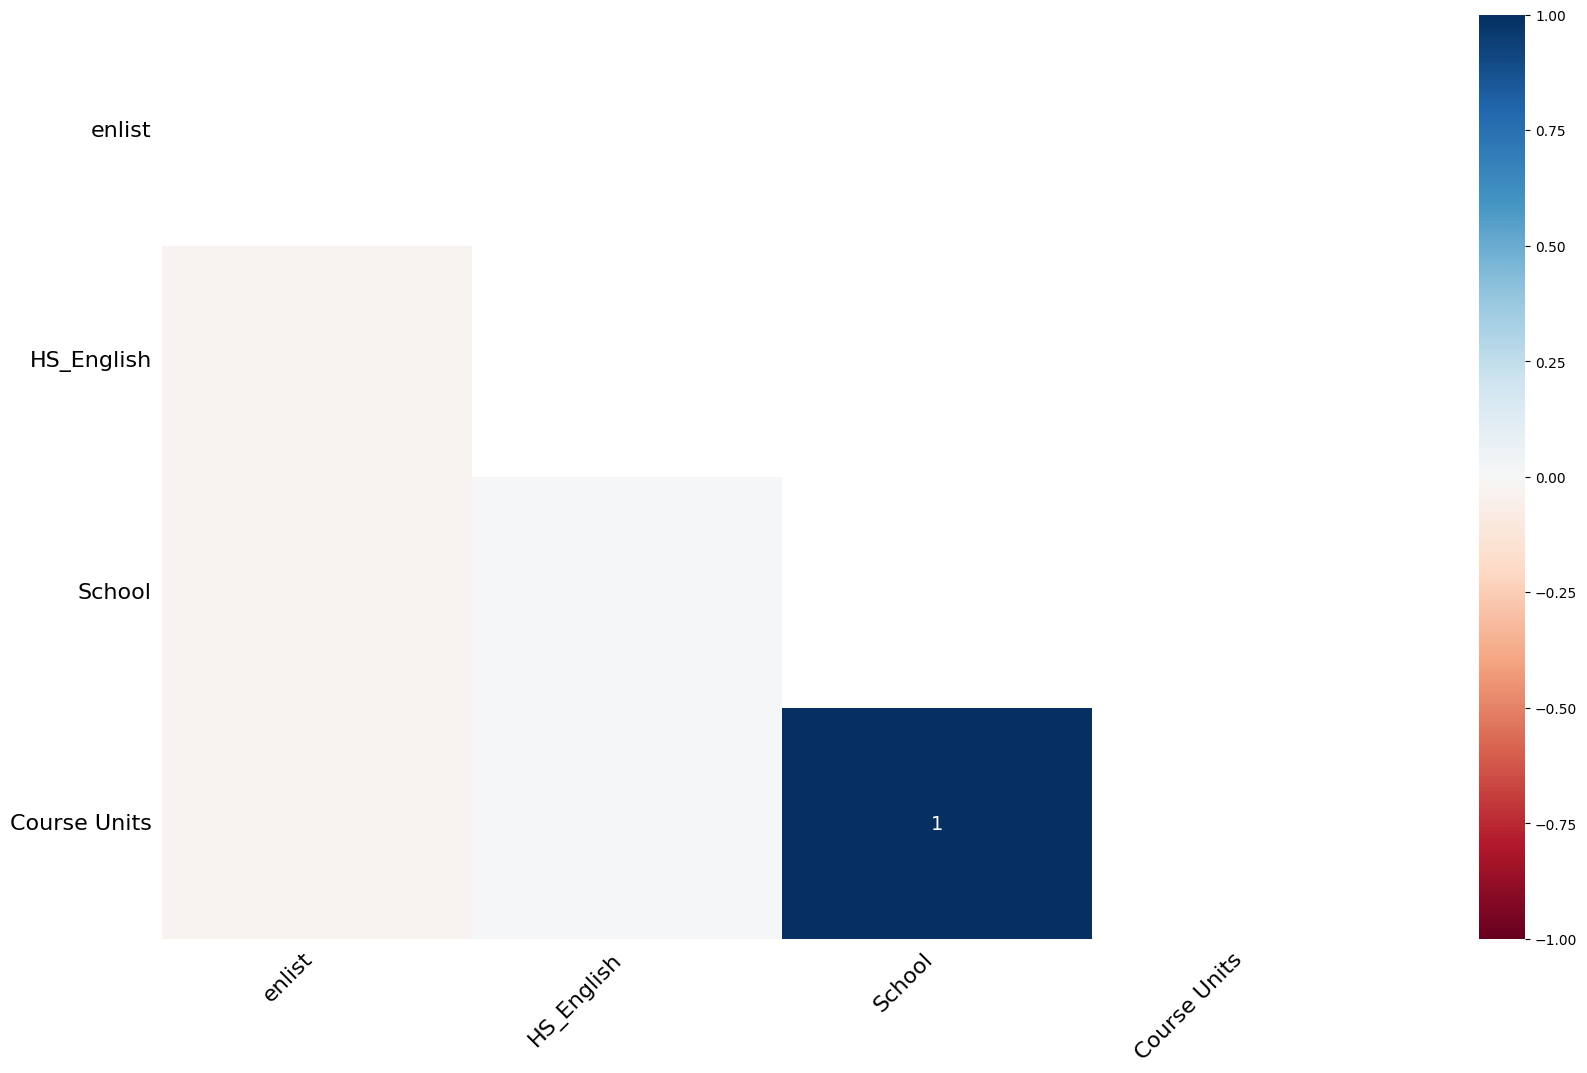

In [52]:
# missingno heatmap visualization to check for correlation of missingness between different columns
msno.heatmap(df)

### Data Understanding Functions

In [53]:
# Prepare to import custom functions
import sys
# append the function.py file file path to the system path
# function.py is uploaded to ./Functions folder
if './Functions' not in sys.path:
    sys.path.append('./Functions')

In [54]:
# Import custom functions
import function as fun

In [55]:
fun.metadata(df)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,STUDENT_ID,int64,0.00,1000,500.082540,291.320155,1.000000,245.750000,501.500000,754.250000,1000.000000
1,Family_Income,float64,0.00,1000,75502.520984,22844.324552,35074.290000,56019.192500,74882.970000,95389.937500,114967.960000
2,Credit_Score_Raw,float64,0.00,996,0.464567,0.231376,0.000735,0.279951,0.516725,0.626726,1.000000
3,Credit_Score_AgeAdj,float64,0.00,1000,0.553017,0.194809,0.045899,0.419019,0.565426,0.708184,0.985665
4,Country,object,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Region,int64,0.00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Married,int64,0.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,enlist,object,70.63,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Unemployed,bool,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,bool,0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Exploration

##### 'STUDENT_ID'

There are no outliers in STUDENT_ID.
----------------------Box plot----------------------


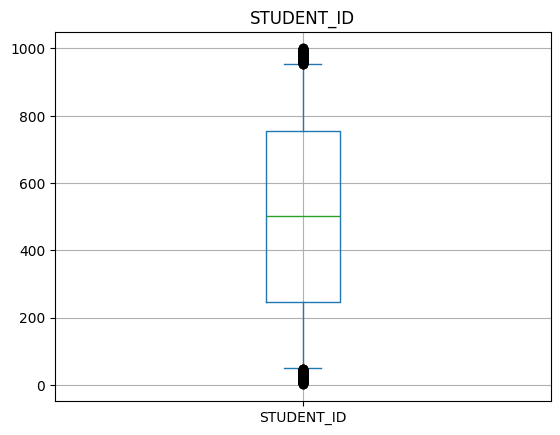

----------------------Distribution plot----------------------


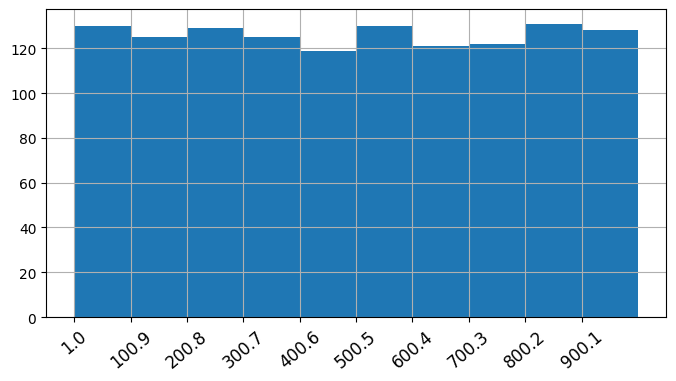

0    1
1    2
2    3
3    4
4    5
Name: STUDENT_ID, dtype: int64

In [56]:
fun.data_exploration(df, 'STUDENT_ID')
df['STUDENT_ID'].head()

##### 'Family_Income'

There are no outliers in Family_Income.
----------------------Box plot----------------------


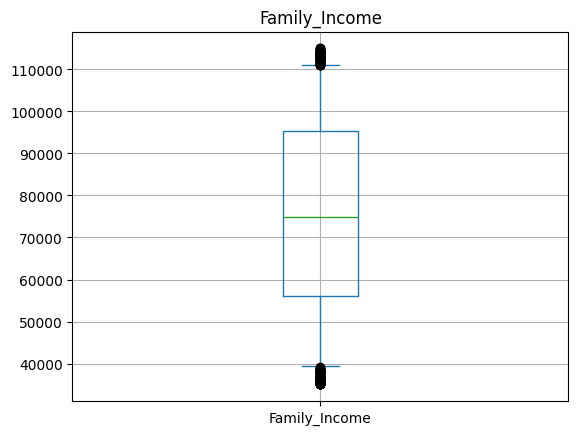

----------------------Distribution plot----------------------


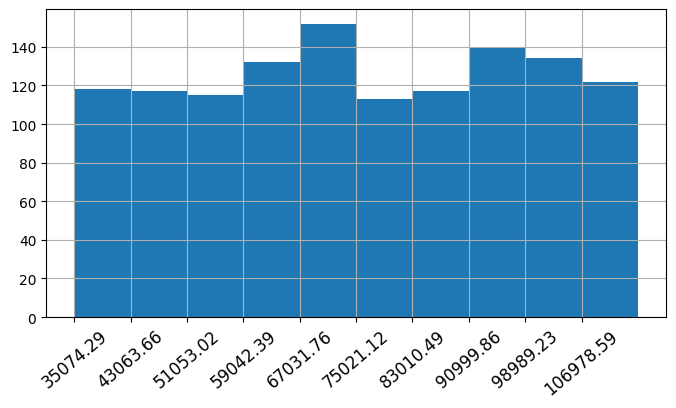

0    109770.95
1     58442.99
2     97125.87
3     55256.40
4     58187.16
Name: Family_Income, dtype: float64

In [57]:
fun.data_exploration(df, 'Family_Income')
df['Family_Income'].head()

##### 'Credit_Score_Raw'

There are no outliers in Credit_Score_Raw.
----------------------Box plot----------------------


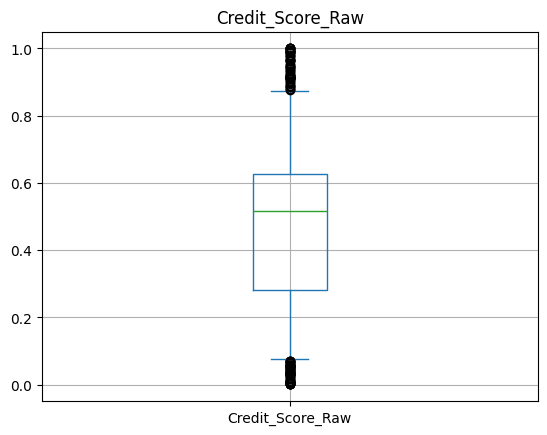

----------------------Distribution plot----------------------


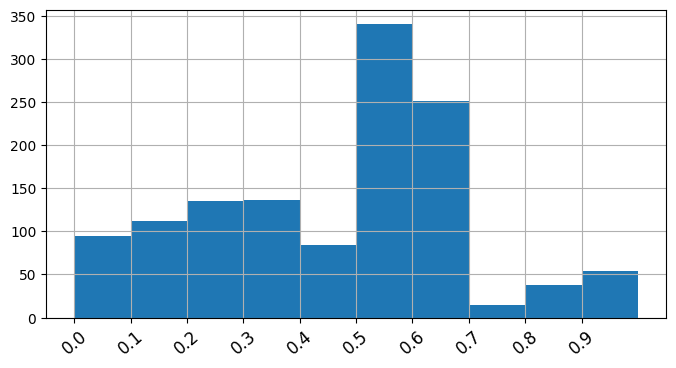

0    0.495227
1    0.987649
2    0.249315
3    0.653183
4    0.273099
Name: Credit_Score_Raw, dtype: float64

In [58]:
fun.data_exploration(df, 'Credit_Score_Raw')
df['Credit_Score_Raw'].head()

##### 'Credit_Score_AgeAdj'

There are no outliers in Credit_Score_AgeAdj.
----------------------Box plot----------------------


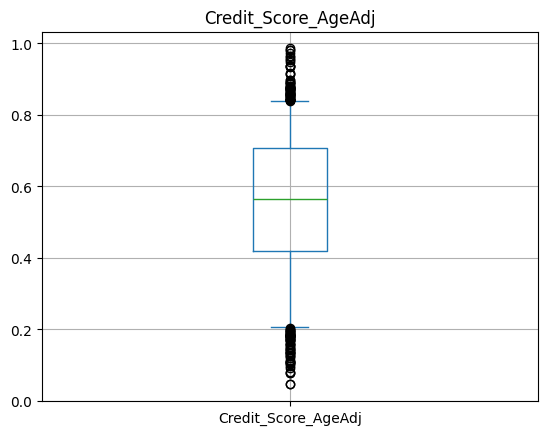

----------------------Distribution plot----------------------


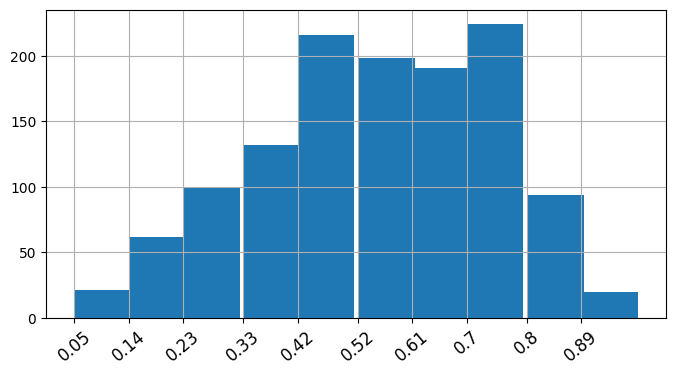

0    0.767967
1    0.529815
2    0.589539
3    0.805702
4    0.415433
Name: Credit_Score_AgeAdj, dtype: float64

In [59]:
fun.data_exploration(df, 'Credit_Score_AgeAdj')
df['Credit_Score_AgeAdj'].head()

##### 'Country'

  Country  counts  %count
0  Belize       2    0.16
1     USA    1258   99.84


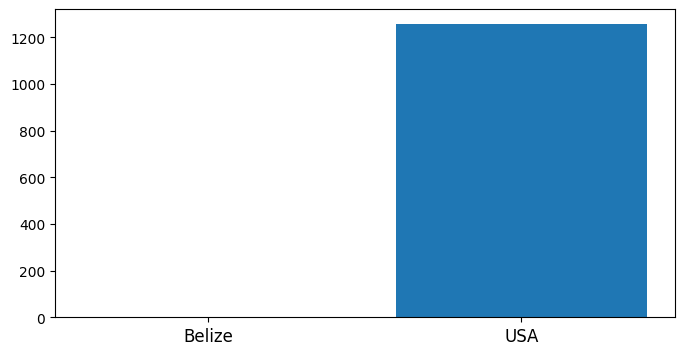

In [60]:
fun.data_exploration(df, 'Country')

##### 'Region'

There are no outliers in Region.
----------------------Box plot----------------------


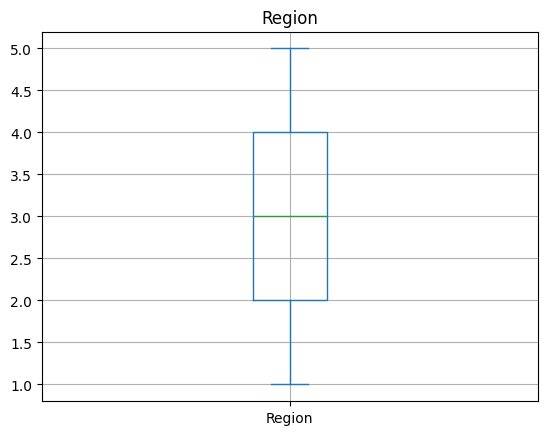

Region
5    262
2    259
3    253
4    247
1    239
Name: count, dtype: int64

In [61]:
fun.data_exploration(df, 'Region')
df['Region'].value_counts()

##### 'Married'

There are no outliers in Married.
----------------------Box plot----------------------


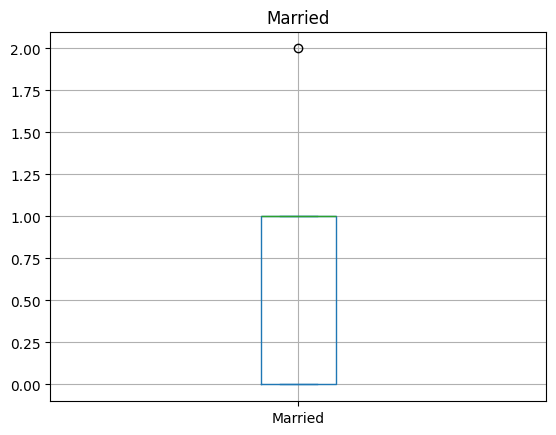

Married
1    677
0    582
2      1
Name: count, dtype: int64

In [62]:
fun.data_exploration(df, 'Married')
df['Married'].value_counts()

##### 'enlist'

            enlist  counts  %count
0        air_force      35    2.78
1             army      40    3.17
2  fire_department     136   10.79
3   foreign_legion      38    3.02
4          marines      36    2.86
5             navy      47    3.73
6      peace_corps      38    3.02


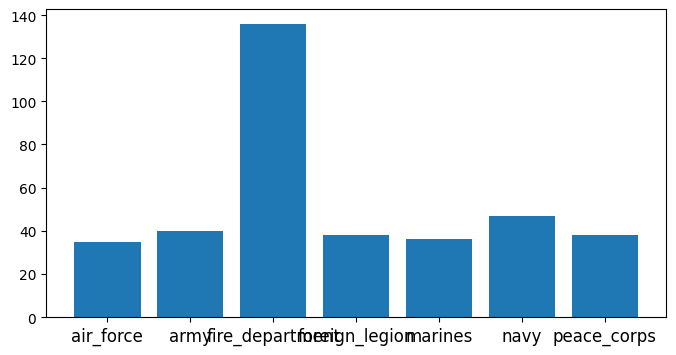

In [63]:
fun.data_exploration(df, 'enlist')

##### 'Unemployed'

There are no outliers in Unemployed.
----------------------Box plot----------------------


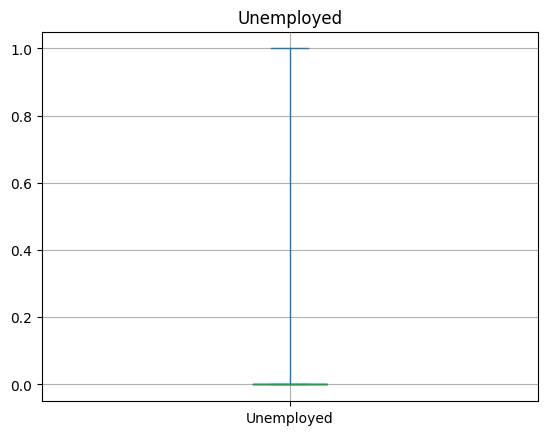

Unemployed
False    1130
True      130
Name: count, dtype: int64

In [64]:
fun.data_exploration(df, 'Unemployed')
df['Unemployed'].value_counts()

##### 'Male'

There are no outliers in Male.
----------------------Box plot----------------------


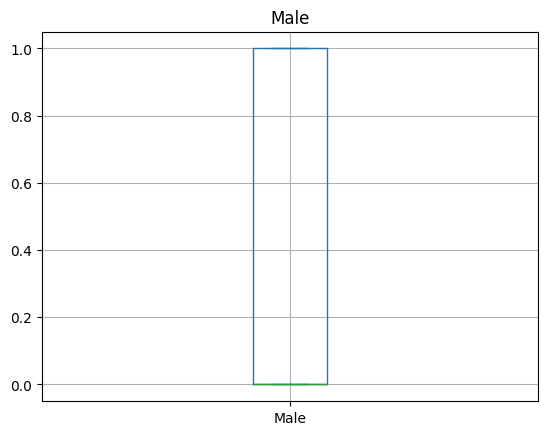

Male
False    636
True     624
Name: count, dtype: int64

In [65]:
fun.data_exploration(df, 'Male')
df['Male'].value_counts()

##### 'LongTermPlannerScore'

There are 8 outliers for LongTermPlannerScore .
[0.16686285232890508, 0.16686285232890508, 0.161963306774495, 0.09097842201845197, 0.09097842201845197, 0.12834460267822523, 0.17022491341254192, 0.17022491341254192]
----------------------Box plot----------------------


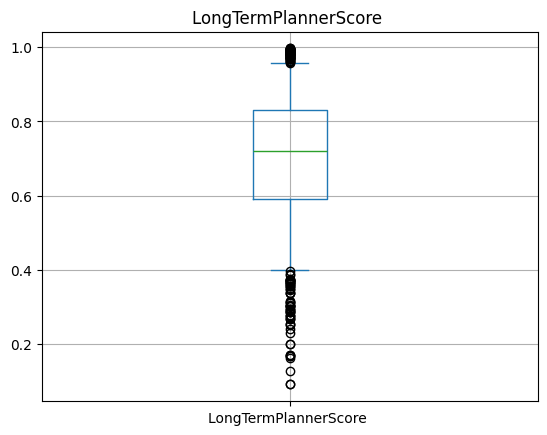

----------------------Distribution plot----------------------


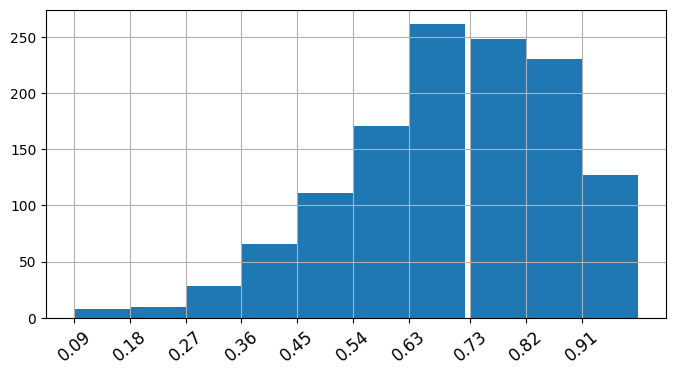

0    0.956004
1    0.601589
2    0.655254
3    0.841278
4    0.738851
Name: LongTermPlannerScore , dtype: float64

In [66]:
fun.data_exploration(df, 'LongTermPlannerScore ')
df['LongTermPlannerScore '].head()

##### 'DecisionStyle'

  DecisionStyle  counts  %count
0    Analytical     107    8.49
1     Emotional    1153   91.51


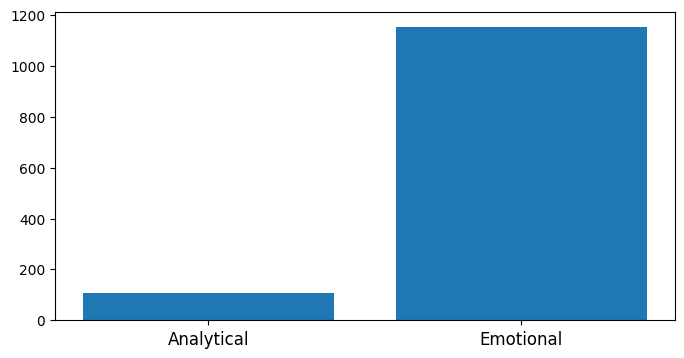

In [67]:
fun.data_exploration(df, 'DecisionStyle')

##### 'PowerOrientedScore'

There are no outliers in PowerOrientedScore.
----------------------Box plot----------------------


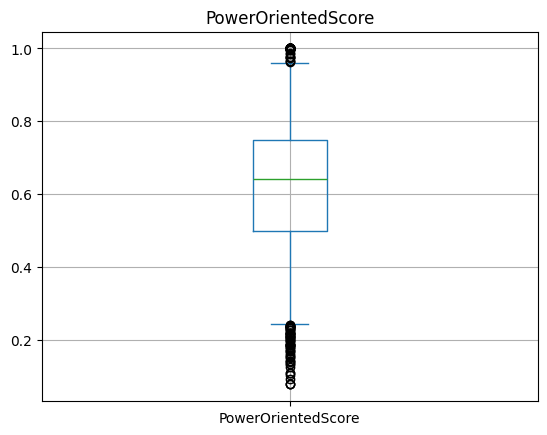

----------------------Distribution plot----------------------


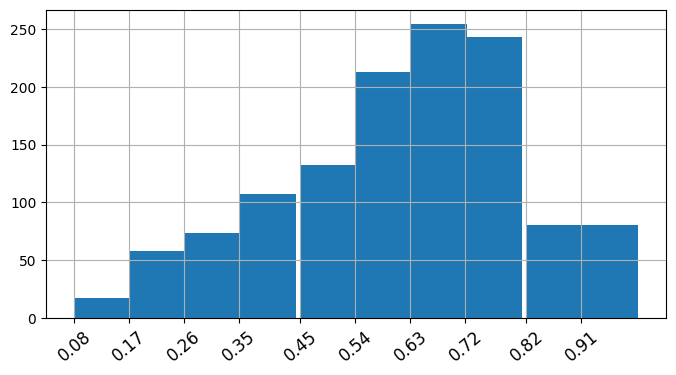

0    0.767967
1    1.000000
2    0.589539
3    0.805702
4    0.415433
Name: PowerOrientedScore, dtype: float64

In [68]:
fun.data_exploration(df, 'PowerOrientedScore')
df['PowerOrientedScore'].head()

##### 'CommunityOrientedScore'

There are no outliers in CommunityOrientedScore.
----------------------Box plot----------------------


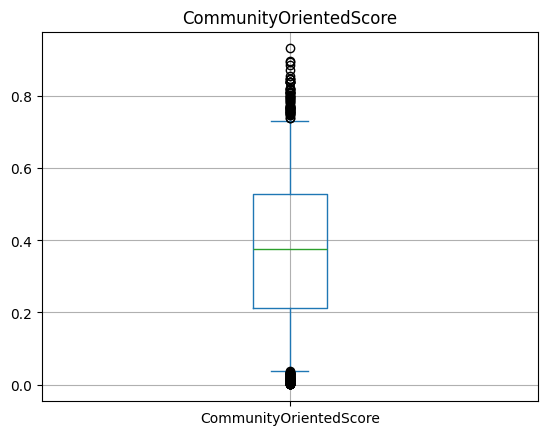

----------------------Distribution plot----------------------


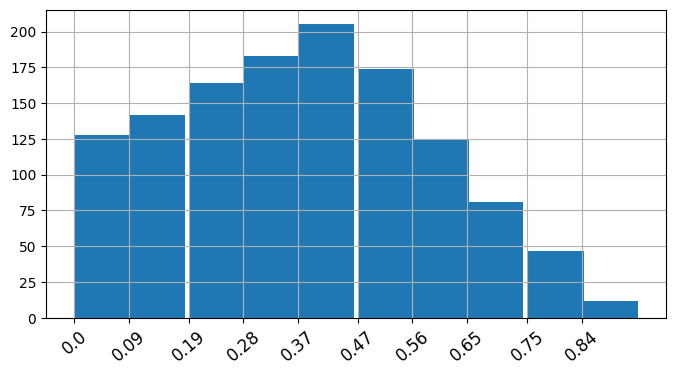

0    0.189491
1    0.529815
2    0.589539
3    0.061538
4    0.241257
Name: CommunityOrientedScore, dtype: float64

In [69]:
fun.data_exploration(df, 'CommunityOrientedScore')
df['CommunityOrientedScore'].head()

##### 'Disabled'

There are 120 outliers for Disabled.
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
----------------------Box plot----------------------


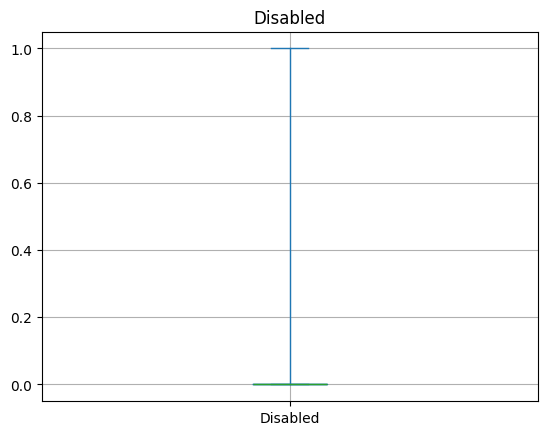

Disabled
False    1140
True      120
Name: count, dtype: int64

In [70]:
fun.data_exploration(df, 'Disabled')
df['Disabled'].value_counts()

##### 'PARENTS_EDUCATION_LEVEL'

  PARENTS_EDUCATION_LEVEL  counts  %count
0        VERY HS or Lower       1    0.08
1              Bachelor's     369   29.29
2               Doctorate     390   30.95
3                   GREAT       2    0.16
4             HS or Lower     361   28.65
5                Master's     134   10.63
6        VERY HS or Lower       3    0.24


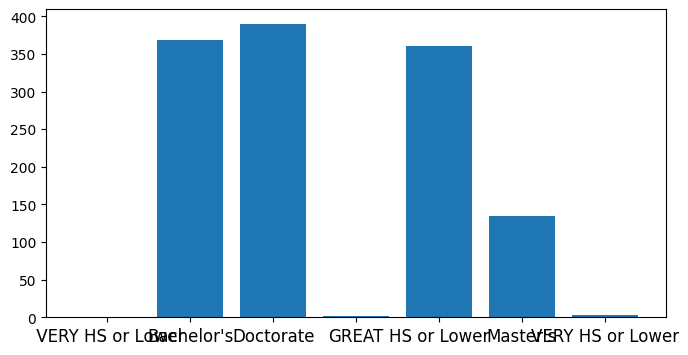

In [71]:
fun.data_exploration(df, 'PARENTS_EDUCATION_LEVEL')

##### 'HS_Math'

There are 9 outliers for HS_Math.
[3, 3, 2, 3, 3, 3, 2, 3, 2]
----------------------Box plot----------------------


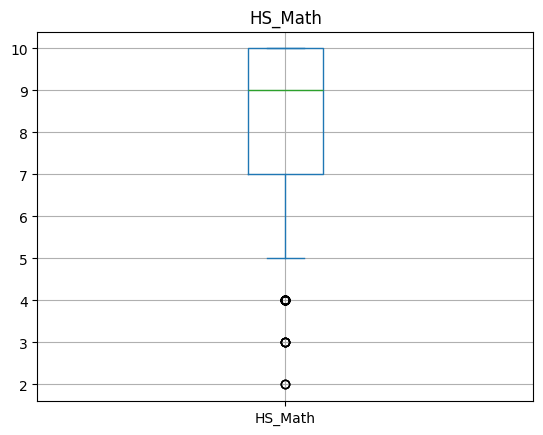

HS_Math
10    341
9     302
7     212
8     193
6     125
5      42
4      36
3       6
2       3
Name: count, dtype: int64

In [72]:
fun.data_exploration(df, 'HS_Math')
df['HS_Math'].value_counts()

##### 'HS_Science'

There are 7 outliers for HS_Science.
[3, 3, 3, 3, 3, 3, 3]
----------------------Box plot----------------------


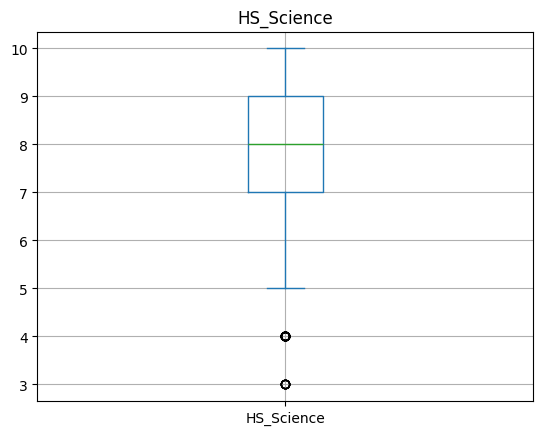

HS_Science
10    304
9     294
7     230
8     226
6     129
5      42
4      28
3       7
Name: count, dtype: int64

In [73]:
fun.data_exploration(df, 'HS_Science')
df['HS_Science'].value_counts()

##### 'HS_English'

There are 6 outliers for HS_English.
[3.0, 3.0, 2.0, 3.0, 3.0, 3.0]
----------------------Box plot----------------------


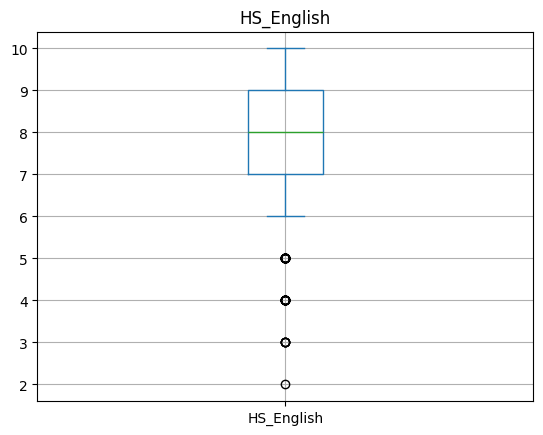

0    10.0
1    10.0
2     6.0
3     9.0
4     5.0
Name: HS_English, dtype: float64

In [74]:
fun.data_exploration(df, 'HS_English')
df['HS_English'].head()

In [75]:
df['HS_English'].value_counts()

HS_English
9.0     296
10.0    284
8.0     246
7.0     226
6.0     132
5.0      29
4.0      23
3.0       5
2.0       1
Name: count, dtype: int64

##### 'School'

  School  counts  %count
0    occ     251   19.92
1    smc     234   18.57
2    ucb      89    7.06
3    uci     236   18.73
4   ucla     239   18.97
5   ucsd     169   13.41


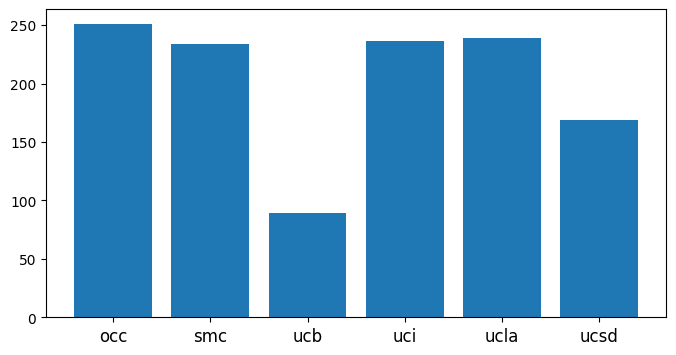

In [76]:
fun.data_exploration(df, 'School')

##### 'Course Units'

In [77]:
fun.data_exploration(df, 'Course Units')
df['Course Units'].value_counts()

Course Units has more than 10 unique values


Course Units
3     134
4     128
2     113
1     110
10    107
9      94
5      90
12     90
6      89
11     81
7      70
8      70
15     16
14     14
13     12
Name: count, dtype: int64

There are no outliers in Course Units.
----------------------Box plot----------------------


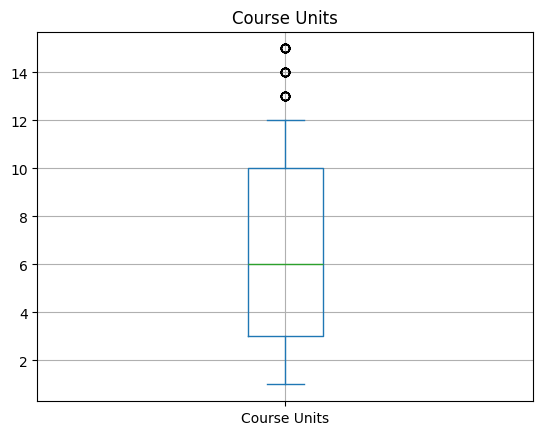

----------------------Distribution plot----------------------


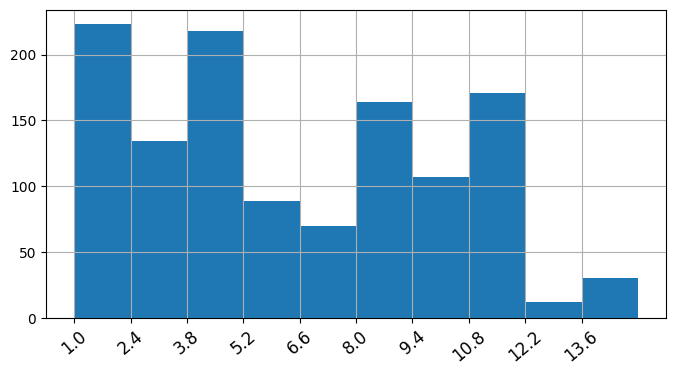

In [78]:
df['Course Units'] = df['Course Units'].astype('Int64')
fun.data_exploration(df, 'Course Units')

##### 'longest_absense_from_school'

In [79]:
fun.data_exploration(df, 'longest_absense_from_school')
df['longest_absense_from_school'].value_counts()

longest_absense_from_school has more than 10 unique values


longest_absense_from_school
4    154
5    139
0    134
3    129
6    125
7    122
1    117
8    117
2    116
9    107
Name: count, dtype: int64

There are no outliers in longest_absense_from_school.
----------------------Box plot----------------------


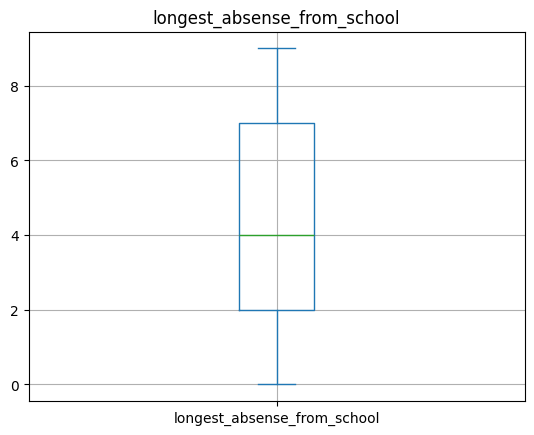

----------------------Distribution plot----------------------


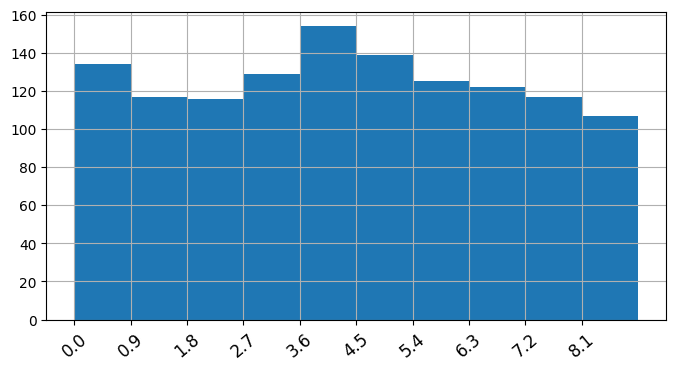

In [80]:
df['longest_absense_from_school'] = df['longest_absense_from_school'].astype('int64')
fun.data_exploration(df, 'longest_absense_from_school')

##### 'Filed_for_Bankruptcy'

There are 120 outliers for Filed_for_Bankruptcy.
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
----------------------Box plot----------------------


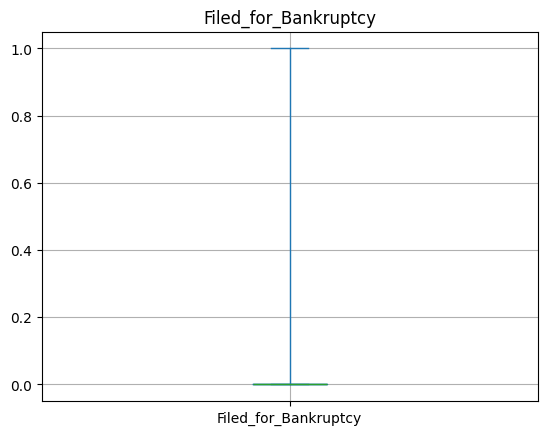

Filed_for_Bankruptcy
False    1140
True      120
Name: count, dtype: int64

In [81]:
fun.data_exploration(df, 'Filed_for_Bankruptcy')
df['Filed_for_Bankruptcy'].value_counts()

##### 'Loan_Amount'

There are 10 outliers for Loan_Amount.
[6277, 5847, 6306, 6620, 6281, 6053, 6053, 6323, 6178, 6178]
----------------------Box plot----------------------


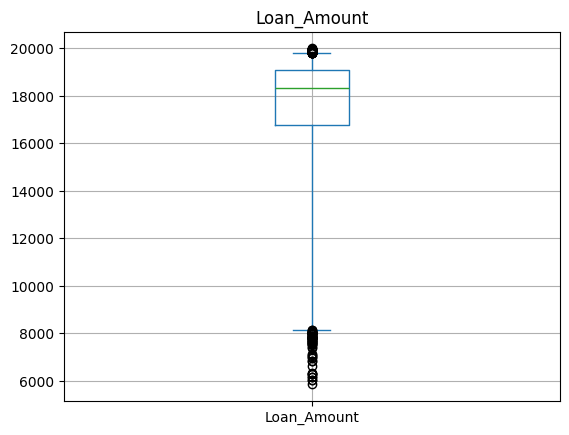

----------------------Distribution plot----------------------


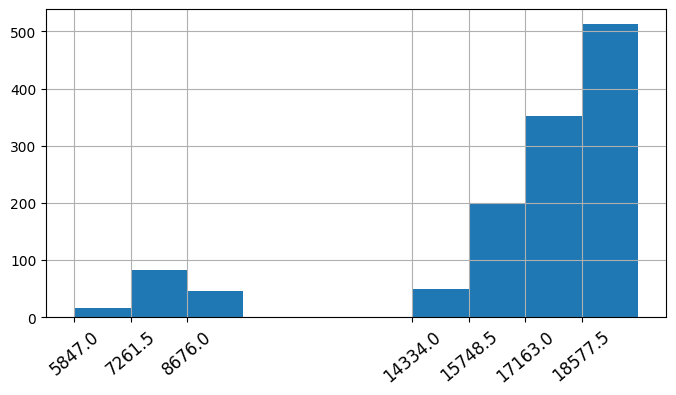

0    19861
1    17391
2     8118
3    18905
4    16175
Name: Loan_Amount, dtype: int64

In [82]:
fun.data_exploration(df, 'Loan_Amount')
df['Loan_Amount'].head()

##### 'no_payment_due'

  no_payment_due  counts  %count
0            neg     440   34.92
1            pos     820   65.08


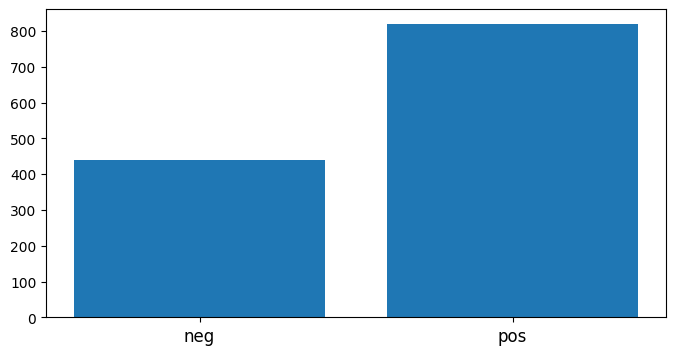

In [83]:
fun.data_exploration(df, 'no_payment_due')

## Data Preparation

### Change Name of 'Family_Income' to 'Annual_Family_Income'

Considering the values within ‘Family_Income’, the name of the variable should be appropriately changed to ‘Annual_Family_Income’ to account for them.

In [84]:
# Create a new dataframe to be prepared for modeling and leave the original dataframe intact
df_model = df.copy()
df_model.rename(columns={'Family_Income':'Annual_Family_Income'}, inplace=True)

### Drop 'Country' from DataFrame

Since over 99% of the values in the ‘Country’ variable are ‘USA’, the variable as a whole does not provide meaningful data towards understanding its impact on the target variable of ‘NoPaymentDue’, leading to the decision to drop this feature in preparation for generating predictive models.

In [85]:
df_model.drop('Country', axis=1, inplace=True)

### Change Name and Individual Value of 'Married'

Instead of having the variable name of ‘Married’, the variable should be changed to ‘Marital_Status’ to be more specific about what this feature means. In addition, the single value of ‘2’ should be changed to a value of ‘1’ since it likely means that this specific student has remarried. The values within ‘Marital_Status’ consist of ‘0’ and ‘1’, which represent ‘Not Married’ and ‘Married’ respectively.

In [86]:
df_model.rename(columns={'Married':'Marital_Status'}, inplace=True)

df_model['Marital_Status'] = df_model['Marital_Status'].replace({2 : 1})
df_model['Marital_Status'].value_counts()

Marital_Status
1    678
0    582
Name: count, dtype: int64

### Change Name and Values of 'enlist'

Instead of having the variable name of ‘enlist’, the variable should be changed to ‘Service_Status’ to be more specific about what this feature means. Then, the values that make up this variable should be changed to ‘Enlisted’ while all the missing values in this same variable should be changed to ‘Not Enlisted’ at the same time to clean this feature better and to be more conducive for analysis.

In [87]:
df_model.rename(columns={'enlist':'Service_Status'}, inplace=True)

df_model['Service_Status'].replace([
    'air_force', 
    'army',
    'fire_department',
    'foreign_legion', 
    'marines', 
    'navy', 
    'peace_corps'], 'Enlisted', inplace=True
)
df_model['Service_Status'].fillna('Not Enlisted', inplace=True)
df_model['Service_Status'].value_counts()

Service_Status
Not Enlisted    890
Enlisted        370
Name: count, dtype: int64

### Bin 'LongTermPlannerScore' Values into '*Low/Medium/High*'

For the variable of ‘LongTermPlannerScore’, since it has a left skew distribution, the values within this feature should be contextually binned as either being ‘Low’, ‘Medium’, or ‘High’ to account for not only the value distribution of this variable, but also to account for the lower outliers as well.

In [88]:
# Remove the space in the column name 'LongTermPlannerScore '
df_model.rename(columns={'LongTermPlannerScore ':'LongTermPlannerScore'}, inplace=True)

# Manually see quantile thresholds for 'LongTermPlannerScore' before doing ternary binning
df_model['LongTermPlannerScore'].quantile([0, 1/3, 2/3, 1])

0.000000    0.090978
0.333333    0.642163
0.666667    0.795821
1.000000    0.996835
Name: LongTermPlannerScore, dtype: float64

In [89]:
df_model['LongTermPlannerScore'] = pd.qcut(
    df_model['LongTermPlannerScore'],
    q=3,
    labels=['Low', 'Medium', 'High']
)
df_model['LongTermPlannerScore'].value_counts()

LongTermPlannerScore
Low       420
Medium    420
High      420
Name: count, dtype: int64

### Change Name and Values of 'PARENTS_EDUCATION_LEVEL'

Instead of having the fully capitalized variable name of ‘PARENTS_EDUCATION_LEVEL’, the variable should be changed to ‘Parents_Education_Level’ to have a consistent naming scheme with the rest of the variables in this dataset. Besides that, the values of ‘VERY HS or Lower’ should be combined with the values of ‘HS or Lower’ to reduce redundancy. In addition, because of the presence of ‘GREAT’ values in this feature, this can assumedly mean graduate education, which means that the values of ‘GREAT’, ‘Master’s’, and ‘Doctorate’ should be combined into one category of ‘Graduate’ to represent all of these aforementioned values and to only have three categories of values in this variable overall.

In [90]:
df_model.rename(columns={'PARENTS_EDUCATION_LEVEL':'Parents_Education_Level'}, inplace=True)

df_model['Parents_Education_Level'].replace(['VERY HS or Lower', ' VERY HS or Lower'], 'HS or Lower', inplace=True)
df_model['Parents_Education_Level'].replace([
    'GREAT',
    "Master's",
    'Doctorate'], 'Graduate', inplace=True
)
df_model['Parents_Education_Level'].value_counts()

Parents_Education_Level
Graduate       526
Bachelor's     369
HS or Lower    365
Name: count, dtype: int64

### Aggregate 'HS_Math', 'HS_Science', and 'HS_English' together into one feature

Instead of having the features of ‘HS_Math’, ‘HS_Science’, and ‘HS_English’ be separate from one another and since they have the same scales, they can be aggregated into one feature of ‘HS_PerformanceAgg’ to increase model efficiency and to have one cumulative score for each student when it comes to academic high school performance. Before combining them, however, the data type of ‘HS_English’ should be changed from ‘float64’ to ‘int64’ to match the data types of the other two features. At the same time, missing values in this feature should be imputed using the median, which provides an average that accounts for the presence of outliers.

In [91]:
# Change data type of 'HS_English' to int64
df_model['HS_English'].astype('Int64')
# Fill missing values in 'HS_English' with the median value
median_value_HS_English = df_model['HS_English'].median()
df_model['HS_English'].fillna(median_value_HS_English, inplace=True)

In [92]:
# Aggregate 'HS_Math', 'HS_Science', and 'HS_English' into a single column
# Calculate an average score for each student
cols_to_aggregate = ['HS_Math', 'HS_Science', 'HS_English']
df_model['HS_PerformanceAgg'] = df_model[cols_to_aggregate].mean(axis=1)
df_model.drop(columns=cols_to_aggregate, inplace=True)
df_model[['STUDENT_ID', 'HS_PerformanceAgg']].head()

,STUDENT_ID,HS_PerformanceAgg
0,1,10.000000
1,2,9.333333
2,3,7.000000
3,4,9.333333
4,5,6.333333


### Change Name and Values of 'School' to 'UC_Enrollment'

Instead of having the variable name of ‘School’, the variable should be changed to ‘UC_Enrollment’ to separate and change each observation as either being ‘UC Enrolled’ or ‘Not UC Enrolled’, so that all of the missing values present here will reflect the latter when there are students who do not have a school listed for some unknown reason (e.g., taking time off willingly, dropped out, hospitalized, etc.).

In [93]:
df_model.rename(columns={'School':'UC_Enrollment'}, inplace=True)

# Replace values in 'UC_Enrollment' column as either 'UC Enrolled' or 'Not UC Enrolled'
df_model['UC_Enrollment'].replace([
    'ucb',
    'uci',
    'ucla',
    'ucsd'], 'UC Enrolled', inplace=True
)
df_model['UC_Enrollment'].replace(['occ','smc'], 'Not UC Enrolled', inplace=True)

# Fill missing values with 'Not UC Enrolled'
df_model['UC_Enrollment'].fillna('Not UC Enrolled', inplace=True)
df_model['UC_Enrollment'].value_counts()

UC_Enrollment
UC Enrolled        733
Not UC Enrolled    527
Name: count, dtype: int64

### Impute Missing Values in 'Course Units' using **RandomForestRegressor**

Given that the data understanding for the variable of ‘Course Units’ reveals that there are missing values for the exact students who are not currently attending school, this feature is considered to be Missing At Random (MAR), so the missing values must be imputed using RandomForestRegressor that incorporates ‘UC_Enrollment’ as a primary estimator.

In [94]:
# Have a numeric version of 'UC_Enrollment' before using RandomForestRegressor
numeric_UC_Enrollment = df_model['UC_Enrollment'].map({
    'UC Enrolled': 1, 'Not UC Enrolled': 0
})

# Split 'Course Units' into rows with and without missing values
units_missing = df_model[df_model['Course Units'].isnull()]
units_not_missing = df_model[df_model['Course Units'].notnull()]

# Define and train the model on 'numeric_UC_Enrollment'
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(
    numeric_UC_Enrollment[units_not_missing.index].values.reshape(-1, 1),
    units_not_missing['Course Units']
)

# Predict the missing values
predicted_values = rf.predict(
    numeric_UC_Enrollment[units_missing.index].values.reshape(-1, 1)
)

# Assign the predicted values to the missing rows in 'Course Units'
df_model.loc[df_model['Course Units'].isnull(), 'Course Units'] = predicted_values.astype('int64')

# Verify that there are no more missing values in 'Course Units'
df_model['Course Units'].isnull().sum()/len(df_model['Course Units'])*100

0.0

### Bin 'Loan_Amount' as Either Being Above or Below the Median

For the variable of ‘Loan_Amount’, since it has a left skew distribution with a significantly large gap in the middle, the values within this feature should be contextually binned as either being above or below the median to account for both the value distribution and its lower outliers.

In [ ]:
# Find out what the median is for 'Loan_Amount' before binning the feature
print(df_model['Loan_Amount'].median())

18329.0


In [104]:
df_model['Loan_Amount'] = pd.cut(
    df_model['Loan_Amount'],
    bins=[-np.inf, 18329, np.inf],
    labels=['<18329', '18329+'],
    right=False
)
df_model['Loan_Amount'].value_counts()

Loan_Amount
18329+    632
<18329    628
Name: count, dtype: int64

### Quick Overview of Updated DataFrame

In [105]:
# Check metadata again
fun.metadata(df_model)

,column_name,datatype,missing_percent,unique,mean,std,min,25%,50%,75%,max
0,STUDENT_ID,int64,0.0,1000,500.08254,291.320155,1.0,245.75,501.5,754.25,1000.0
1,Annual_Family_Income,float64,0.0,1000,75502.520984,22844.324552,35074.29,56019.1925,74882.97,95389.9375,114967.96
2,Credit_Score_Raw,float64,0.0,996,0.464567,0.231376,0.000735,0.279951,0.516725,0.626726,1.0
3,Credit_Score_AgeAdj,float64,0.0,1000,0.553017,0.194809,0.045899,0.419019,0.565426,0.708184,0.985665
4,Region,int64,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Marital_Status,int64,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Service_Status,object,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Unemployed,bool,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Male,bool,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,LongTermPlannerScore,category,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are no outliers in STUDENT_ID.
----------------------Box plot----------------------


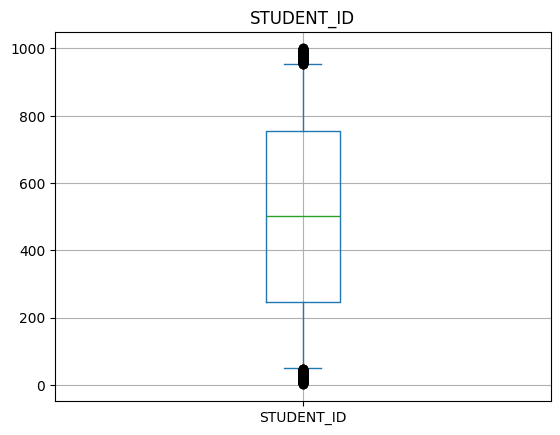

----------------------Distribution plot----------------------


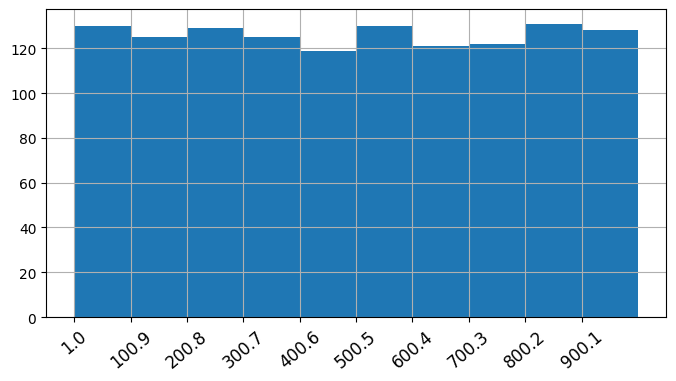

There are no outliers in Annual_Family_Income.
----------------------Box plot----------------------


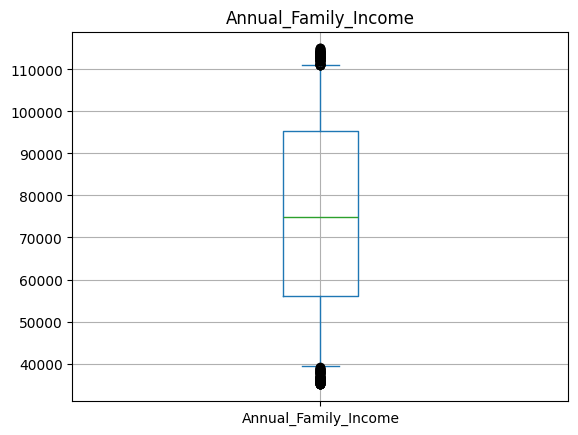

----------------------Distribution plot----------------------


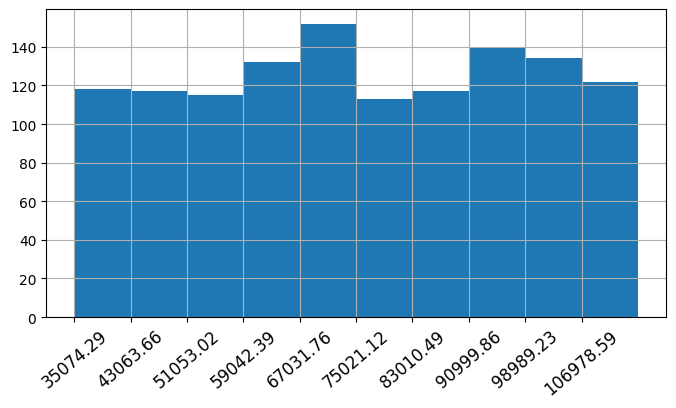

There are no outliers in Credit_Score_Raw.
----------------------Box plot----------------------


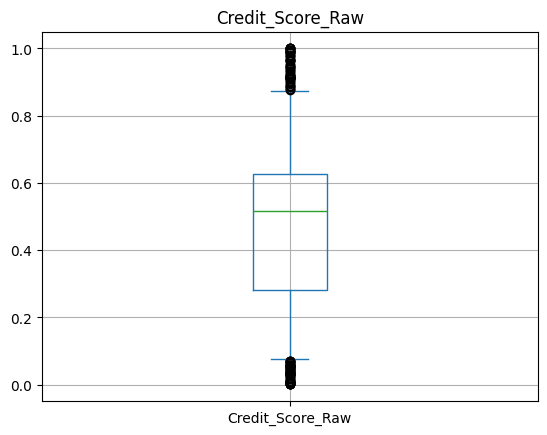

----------------------Distribution plot----------------------


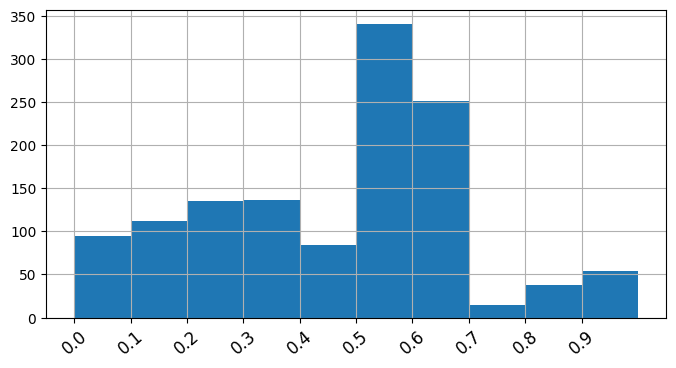

There are no outliers in Credit_Score_AgeAdj.
----------------------Box plot----------------------


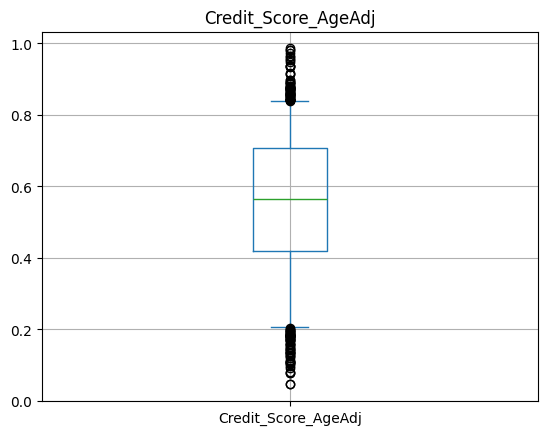

----------------------Distribution plot----------------------


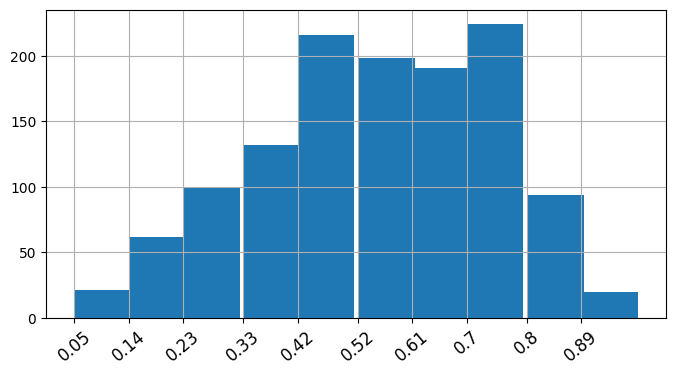

There are no outliers in Region.
----------------------Box plot----------------------


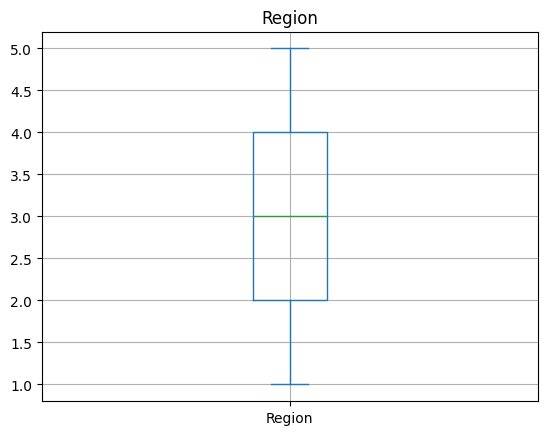

There are no outliers in Marital_Status.
----------------------Box plot----------------------


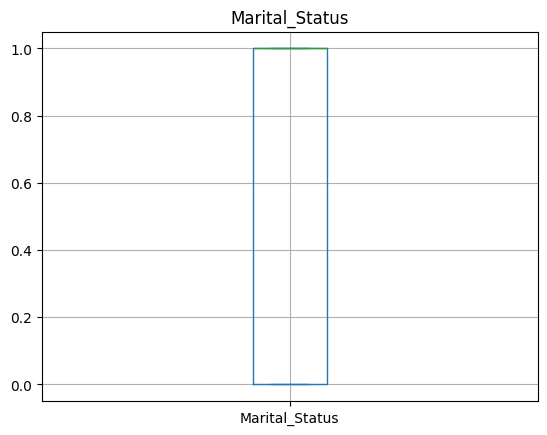

  Service_Status  counts  %count
0       Enlisted     370   29.37
1   Not Enlisted     890   70.63


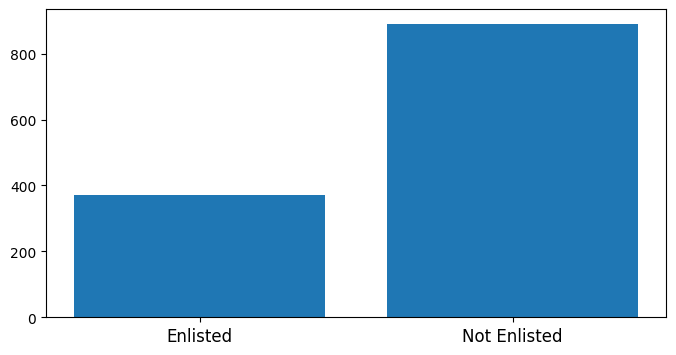

There are no outliers in Unemployed.
----------------------Box plot----------------------


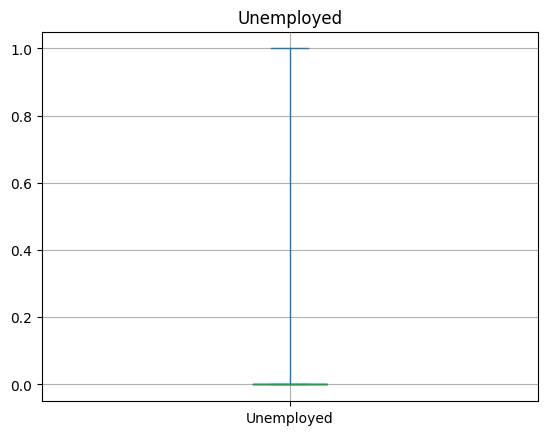

There are no outliers in Male.
----------------------Box plot----------------------


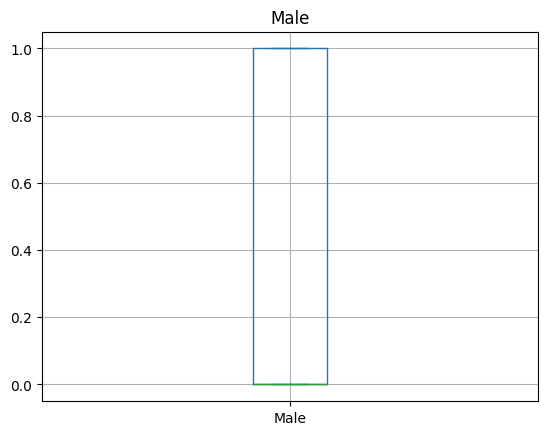

  LongTermPlannerScore  counts  %count
0                  Low     420   33.33
1               Medium     420   33.33
2                 High     420   33.33


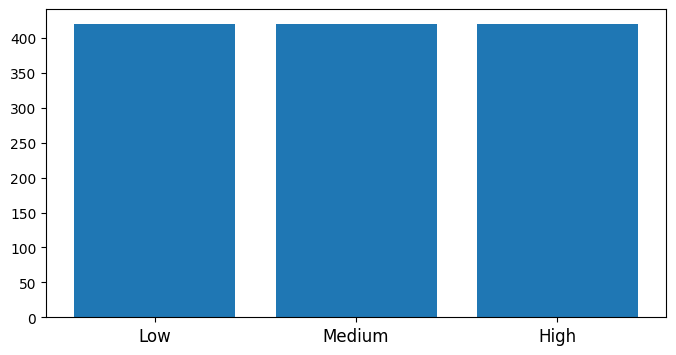

  DecisionStyle  counts  %count
0    Analytical     107    8.49
1     Emotional    1153   91.51


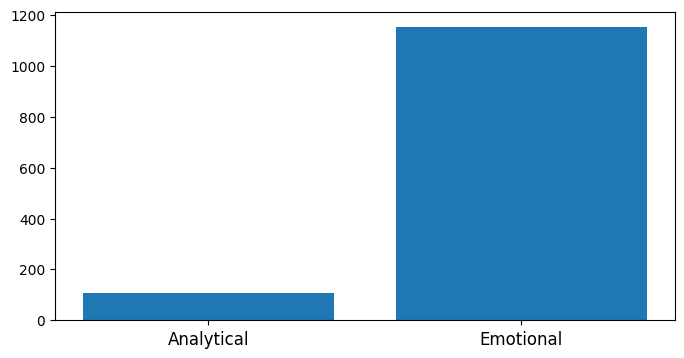

There are no outliers in PowerOrientedScore.
----------------------Box plot----------------------


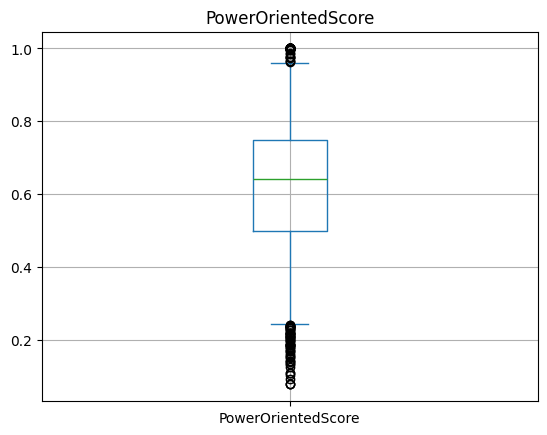

----------------------Distribution plot----------------------


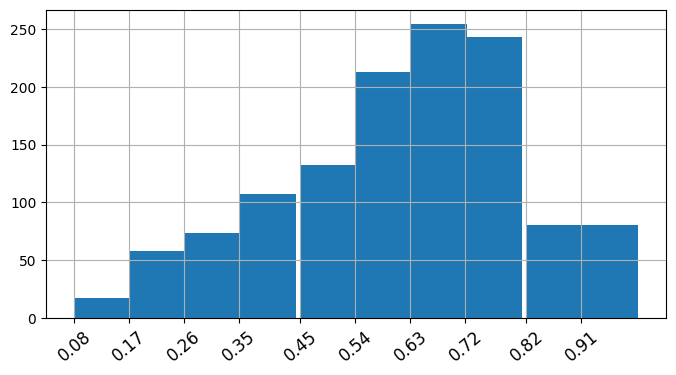

There are no outliers in CommunityOrientedScore.
----------------------Box plot----------------------


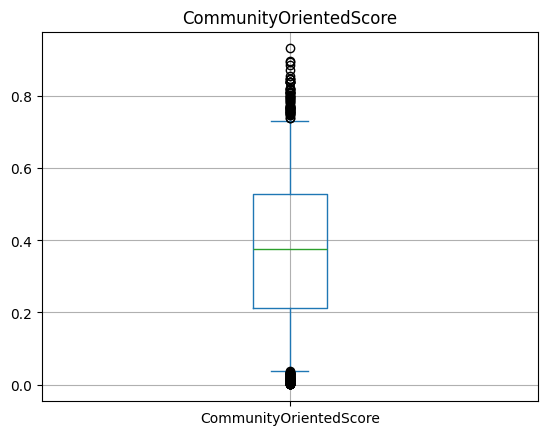

----------------------Distribution plot----------------------


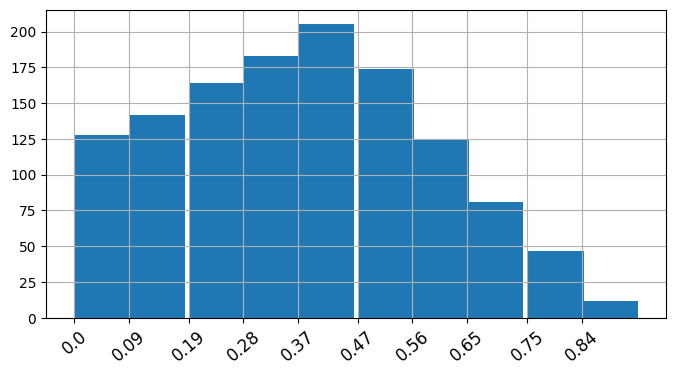

There are 120 outliers for Disabled.
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
----------------------Box plot----------------------


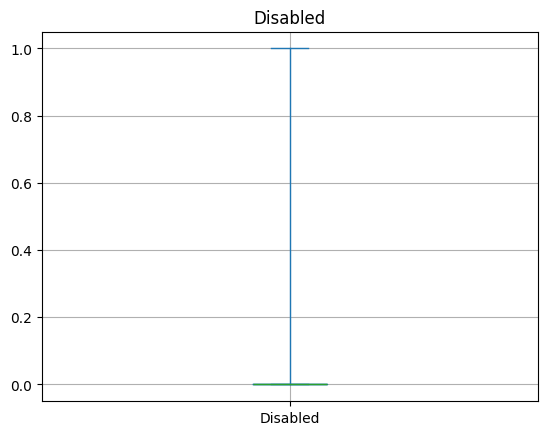

  Parents_Education_Level  counts  %count
0              Bachelor's     369   29.29
1                Graduate     526   41.75
2             HS or Lower     365   28.97


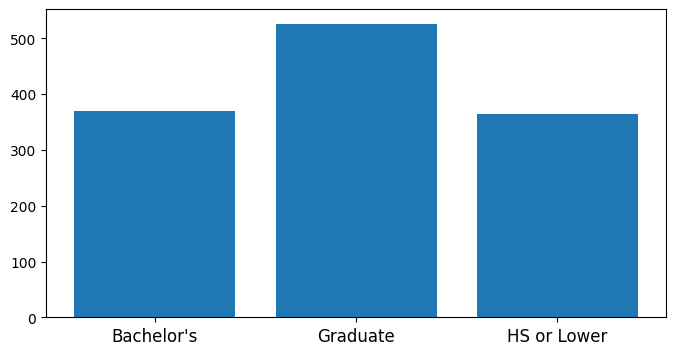

     UC_Enrollment  counts  %count
0  Not UC Enrolled     527   41.83
1      UC Enrolled     733   58.17


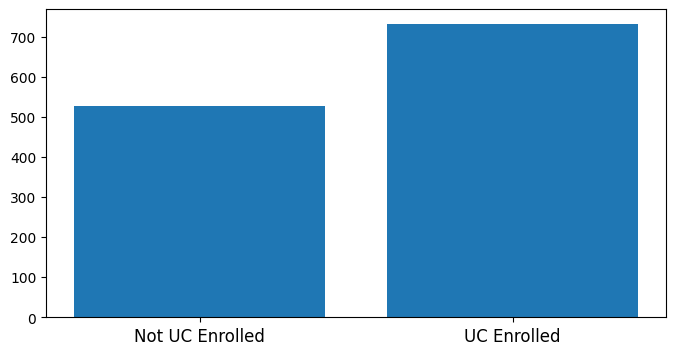

There are no outliers in Course Units.
----------------------Box plot----------------------


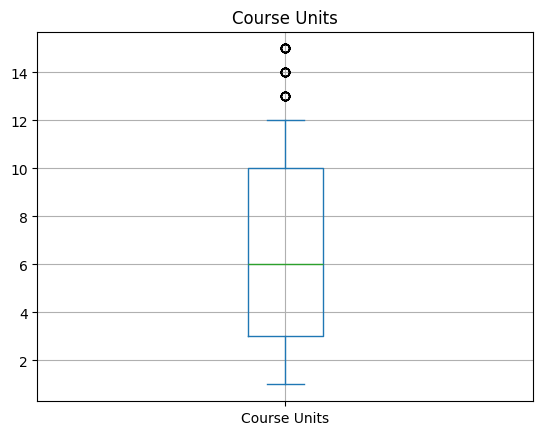

----------------------Distribution plot----------------------


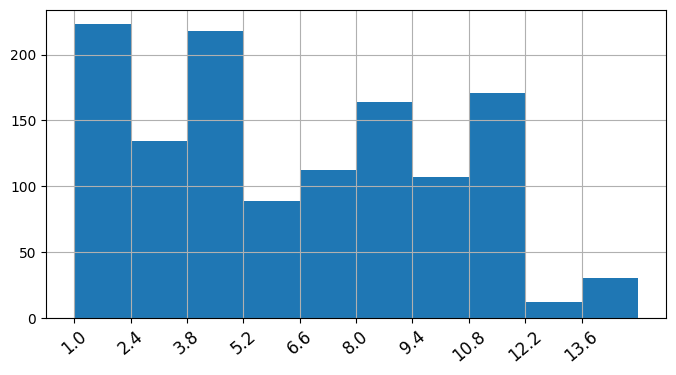

There are no outliers in longest_absense_from_school.
----------------------Box plot----------------------


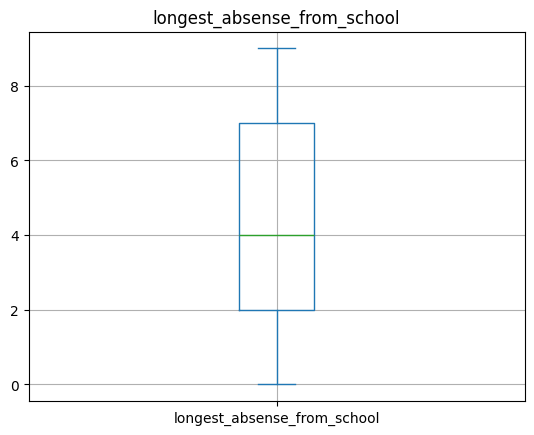

----------------------Distribution plot----------------------


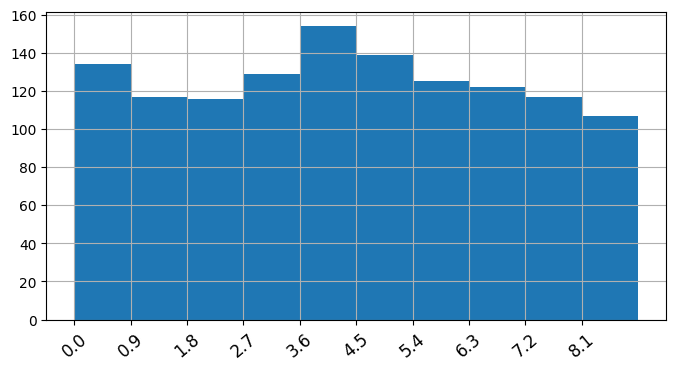

There are 120 outliers for Filed_for_Bankruptcy.
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
----------------------Box plot----------------------


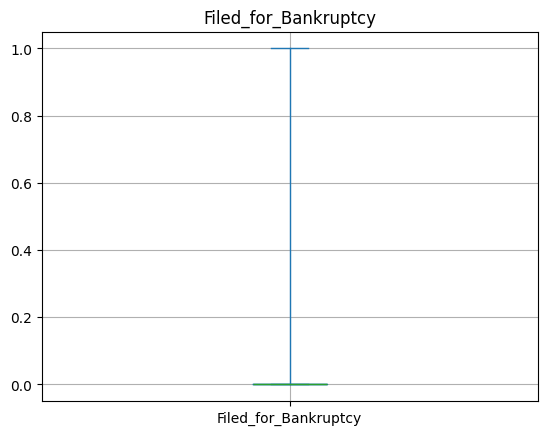

  Loan_Amount  counts  %count
0      <18329     628   49.84
1      18329+     632   50.16


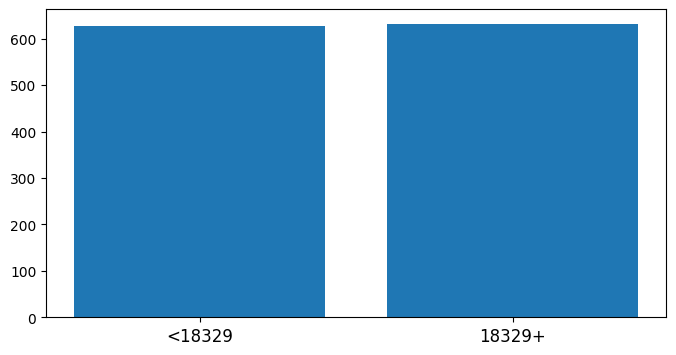

  no_payment_due  counts  %count
0            neg     440   34.92
1            pos     820   65.08


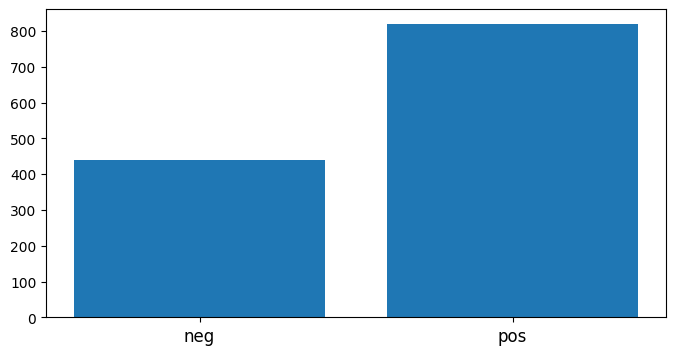

There are 6 outliers for HS_PerformanceAgg.
[4.0, 3.6666666666666665, 3.6666666666666665, 4.0, 3.6666666666666665, 3.0]
----------------------Box plot----------------------


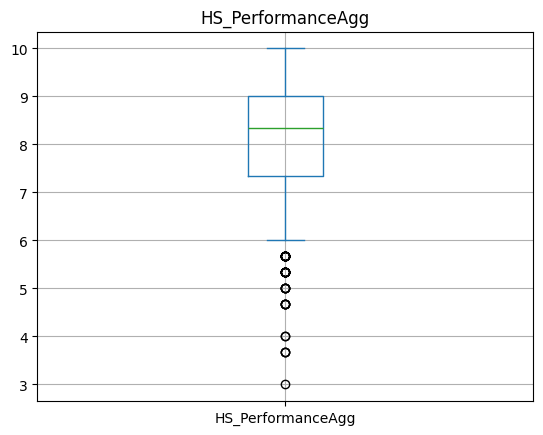

----------------------Distribution plot----------------------


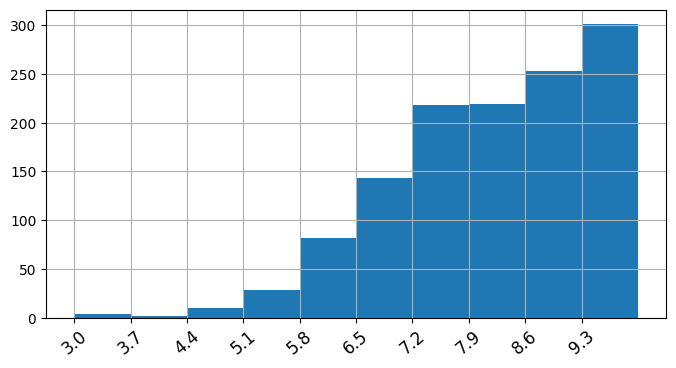

In [108]:
# Check data exploration again
for column in df_model.columns:
  fun.data_exploration(df_model, column)

In [ ]:
import seaborn as sns
%config InLineBackend.figure_format = 'svg'

df_correlation = df
df_columns = list(df.columns)
plt.figure(figsize=(12,6))
g = sns.heatmap(df_correlation[df_columns].corr(),
                annot=True,
                cmap = "coolwarm")

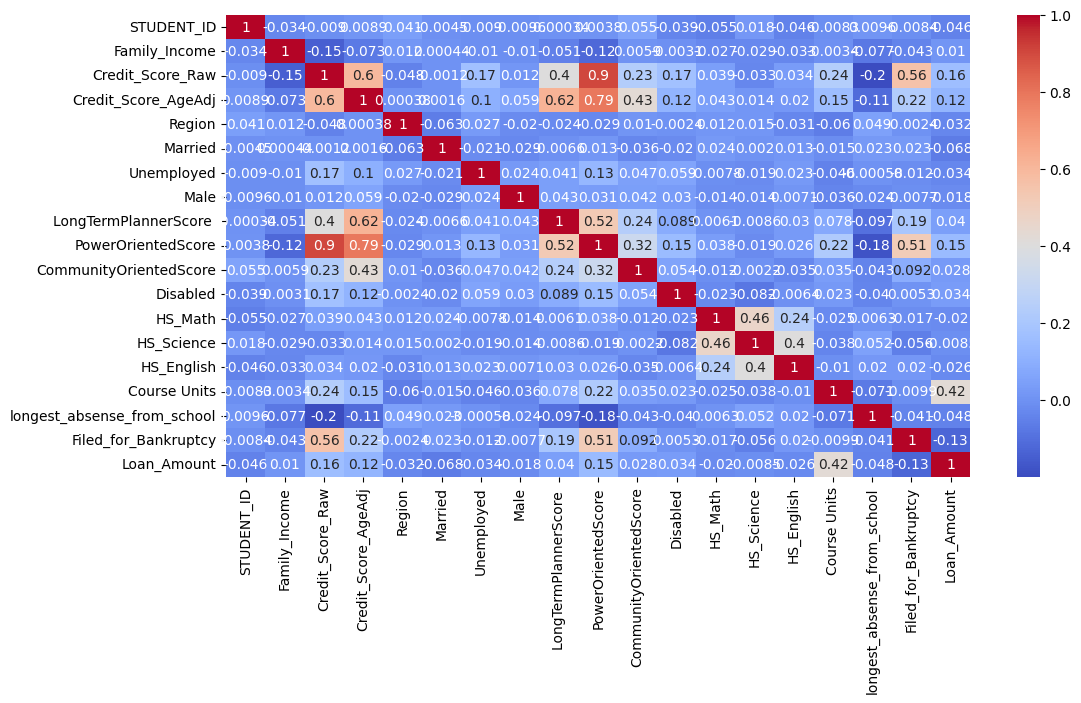

In [216]:
import seaborn as sns
%config InLineBackend.figure_format = 'svg'

df_correlation = df
df_columns = list(df.columns)
plt.figure(figsize=(12,6))
g = sns.heatmap(df_correlation[df_columns].corr(numeric_only=True),
                annot=True,
                cmap = "coolwarm")

## Modeling

### Task A1

### Task A2

### Task A3

### Task A4

### Task A5